
# Exploratory Data Analysis – Healthcare Dataset

This notebook provides a **deep exploratory analysis** of the healthcare dataset used in the project.  
We aim to gain a full understanding of the data at every stage:

- Raw data analysis
- Cleaned data analysis
- MongoDB-exported data analysis

Each part includes detailed statistical analysis, visualizations, and anomaly detection.

---


In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
from dotenv import load_dotenv

# Setup
load_dotenv()
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)
pd.set_option('display.max_columns', None)

# Define base directory
BASE_DIR = os.path.dirname(os.getcwd())  # if you run from `scripts/`
CSV_PATH = os.path.join(BASE_DIR, 'data', 'healthcare_dataset.csv')
CSV_PATH_CLEANED = os.path.join(BASE_DIR, 'data', 'cleaned_healthcare_dataset.csv')


##  Part 1 – Raw Data Analysis

In [2]:

# Load the raw dataset
df_raw = pd.read_csv(CSV_PATH)
df_raw.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [3]:

# Structure of the dataset
df_raw.info()

# Descriptive statistics
df_raw.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500.000000,55500,55500,55500,55500,55500,55500,55500,55500.000000,55500.000000,55500,55500,55500,55500
unique,49992,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3
top,DAvId muNoZ,NaN,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,NaN,NaN,Elective,2020-03-15,Lipitor,Abnormal
freq,3,NaN,27774,6969,9308,50,27,44,11249,NaN,NaN,18655,53,11140,18627
mean,NaN,51.539459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25539.316097,301.134829,NaN,NaN,NaN,NaN
std,NaN,19.602454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14211.454431,115.243069,NaN,NaN,NaN,NaN
min,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13241.224652,202.000000,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25538.069376,302.000000,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37820.508436,401.000000,NaN,NaN,NaN,NaN


In [4]:

# Null values count
print("Null values count:")
print(df_raw.isnull().sum())
display(df_raw.isnull().sum()[df_raw.isnull().sum() > 0])

# Check duplicates
print("Duplicate rows count:", df_raw.duplicated().sum())
display(df_raw[df_raw.duplicated(keep=False)].sort_values(by=list(df_raw.columns)))


Null values count:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


Series([], dtype: int64)

Duplicate rows count: 534


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
42407,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal
54285,ABIgaIL YOung,41,Female,O+,Hypertension,2022-12-15,Edward Kramer,Moore-Mcdaniel,UnitedHealthcare,1983.568297,192,Elective,2023-01-13,Ibuprofen,Normal
26025,ALIcia taYLoR,78,Male,O+,Asthma,2022-09-18,Dawn Burton,Wright LLC,Aetna,31465.274979,149,Elective,2022-10-15,Aspirin,Inconclusive
53104,ALIcia taYLoR,78,Male,O+,Asthma,2022-09-18,Dawn Burton,Wright LLC,Aetna,31465.274979,149,Elective,2022-10-15,Aspirin,Inconclusive
42323,AMy GREEN,79,Female,B+,Obesity,2021-03-30,Brett Johnson,Taylor-Williamson,UnitedHealthcare,23402.358491,249,Elective,2021-04-27,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
27374,willIAM DUnCan,78,Female,B-,Arthritis,2019-08-04,Margaret Rice,"and Hobbs Rice, Miller",UnitedHealthcare,4537.845577,383,Elective,2019-08-17,Aspirin,Abnormal
53693,willIAM DUnCan,78,Female,B-,Arthritis,2019-08-04,Margaret Rice,"and Hobbs Rice, Miller",UnitedHealthcare,4537.845577,383,Elective,2019-08-17,Aspirin,Abnormal
6345,zaCHAry balL,85,Female,B-,Diabetes,2020-04-25,Matthew Conley,"and Morgan Jones, Matthews",Blue Cross,15207.547262,202,Emergency,2020-05-25,Penicillin,Inconclusive


In [5]:
# Normalize column names
df_raw.columns = (
    df_raw.columns
    .str.strip()                                        # Remove leading/trailing whitespaces
    .str.lower()                                        # Convert column names to lowercase
    .str.replace(' ', '_')                              # Replace spaces with underscores
    .str.replace(r'[^a-z0-9_]', '', regex=True)         # Remove special characters
)

In [6]:
# Normalize all string values in the DataFrame
for col in df_raw.columns:
    if df_raw[col].dtype == 'object':                      # Only process string/object type columns
        df_raw[col] = (
            df_raw[col]
            .astype(str)                               # Ensure all values are string type
            .str.strip()                               # Remove leading/trailing whitespaces
            .str.strip(',')                            # Remove trailing commas
            .str.replace(r'\s+', '_', regex=True)      # Replace any whitespace with underscores
            .str.lower()                               # Convert all text to lowercase
        )

In [7]:
# Transform date columns to datetime format
for date_col in ['date_of_admission', 'discharge_date']:   # Loop through expected date columns
    if date_col in df_raw.columns:                            # Check if the column exists
        df_raw[date_col] = pd.to_datetime(df_raw[date_col], errors='coerce')  # Convert to datetime, coerce errors to NaT

In [8]:
# Create a patient key
if all(col in df_raw.columns for col in ['name', 'date_of_admission', 'hospital']):
    df_raw['patient_key'] = (
        df_raw['name'] + "_" +
        df_raw['date_of_admission'].dt.strftime('%Y-%m-%d') + "_" +
        df_raw['hospital']
    ).str.lower().str.replace(r'\s+', '_', regex=True).str.strip(',')

df_raw.head()

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
0,bobby_jackson,30,male,b-,cancer,2024-01-31,matthew_smith,sons_and_miller,blue_cross,18856.281306,328,urgent,2024-02-02,paracetamol,normal,bobby_jackson_2024-01-31_sons_and_miller
1,leslie_terry,62,male,a+,obesity,2019-08-20,samantha_davies,kim_inc,medicare,33643.327287,265,emergency,2019-08-26,ibuprofen,inconclusive,leslie_terry_2019-08-20_kim_inc
2,danny_smith,76,female,a-,obesity,2022-09-22,tiffany_mitchell,cook_plc,aetna,27955.096079,205,emergency,2022-10-07,aspirin,normal,danny_smith_2022-09-22_cook_plc
3,andrew_watts,28,female,o+,diabetes,2020-11-18,kevin_wells,hernandez_rogers_and_vang,medicare,37909.782410,450,elective,2020-12-18,ibuprofen,abnormal,andrew_watts_2020-11-18_hernandez_rogers_and_vang
4,adrienne_bell,43,female,ab+,cancer,2022-09-19,kathleen_hanna,white-white,aetna,14238.317814,458,urgent,2022-10-09,penicillin,abnormal,adrienne_bell_2022-09-19_white-white


In [9]:
# Check duplicates again after processing on patient_key :
print("Duplicate rows count after processing:", df_raw.duplicated(subset=['patient_key']).sum())
display(df_raw[df_raw.duplicated(subset=['patient_key'], keep=False)].sort_values(by='patient_key'))


Duplicate rows count after processing: 5500


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
54112,aaron_archer,49,female,b-,cancer,2021-01-10,cynthia_villanueva,montes_case_and_mendez,medicare,10602.077185,108,urgent,2021-01-17,paracetamol,inconclusive,aaron_archer_2021-01-10_montes_case_and_mendez
3040,aaron_archer,47,female,b-,cancer,2021-01-10,cynthia_villanueva,montes_case_and_mendez,medicare,10602.077185,108,urgent,2021-01-17,paracetamol,inconclusive,aaron_archer_2021-01-10_montes_case_and_mendez
51385,aaron_carr,60,female,o-,asthma,2023-06-20,diane_davis,"jones,_holmes_kelley_and",blue_cross,29042.961828,171,emergency,2023-06-21,paracetamol,abnormal,"aaron_carr_2023-06-20_jones,_holmes_kelley_and"
33886,aaron_carr,59,female,o-,asthma,2023-06-20,diane_davis,"jones,_holmes_kelley_and",blue_cross,29042.961828,171,emergency,2023-06-21,paracetamol,abnormal,"aaron_carr_2023-06-20_jones,_holmes_kelley_and"
52721,aaron_dalton,26,male,o+,arthritis,2022-08-22,sarah_adams,schroeder_plc,blue_cross,2070.259477,279,urgent,2022-09-05,paracetamol,inconclusive,aaron_dalton_2022-08-22_schroeder_plc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22540,zachary_williams,70,female,o+,arthritis,2024-01-16,carol_shepard,chen-munoz,cigna,36948.486063,118,emergency,2024-02-15,aspirin,abnormal,zachary_williams_2024-01-16_chen-munoz
54593,zachary_wright,42,female,o+,hypertension,2019-11-05,dana_vega,"ray_james,_davis_and",cigna,15339.365307,125,elective,2019-11-18,ibuprofen,normal,"zachary_wright_2019-11-05_ray_james,_davis_and"
44193,zachary_wright,45,female,o+,hypertension,2019-11-05,dana_vega,"ray_james,_davis_and",cigna,15339.365307,125,elective,2019-11-18,ibuprofen,normal,"zachary_wright_2019-11-05_ray_james,_davis_and"
41646,zoe_rodriguez,53,female,o+,cancer,2024-03-22,david_keller,jones_ltd,medicare,9024.092301,178,elective,2024-04-08,penicillin,inconclusive,zoe_rodriguez_2024-03-22_jones_ltd


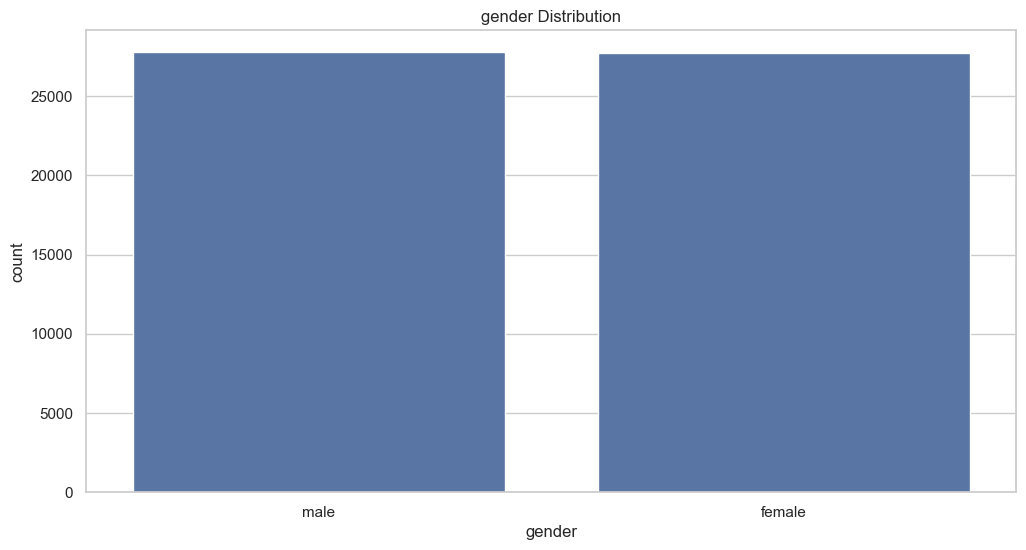

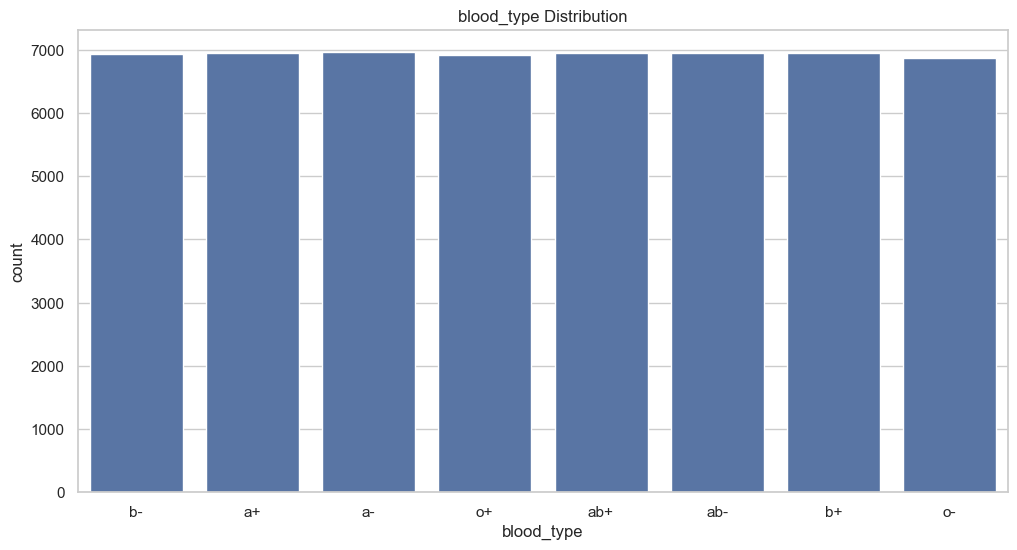

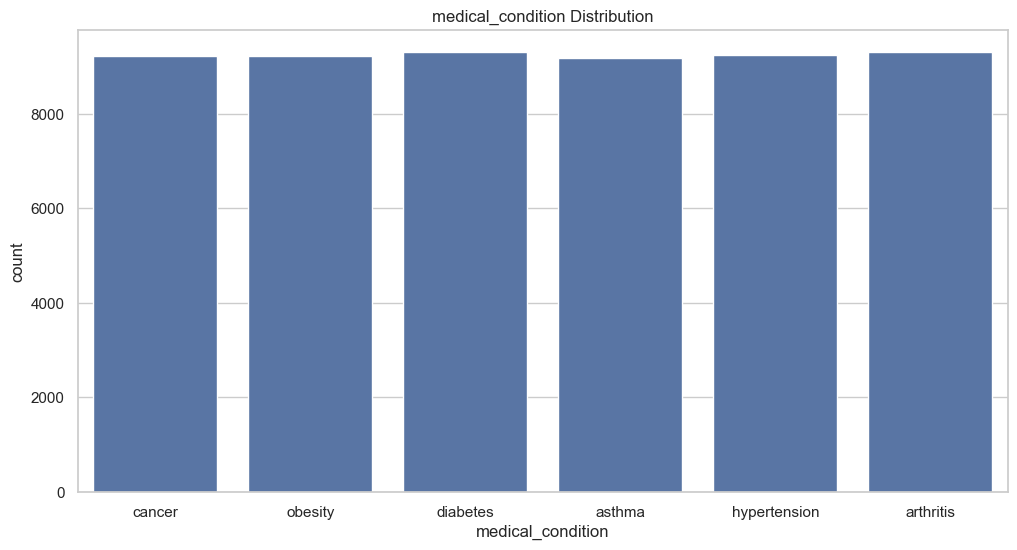

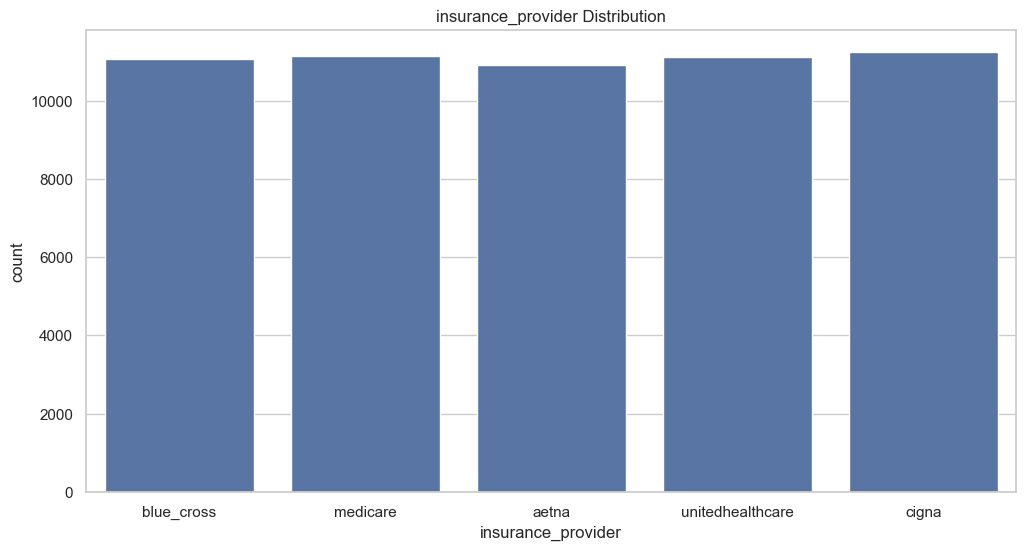

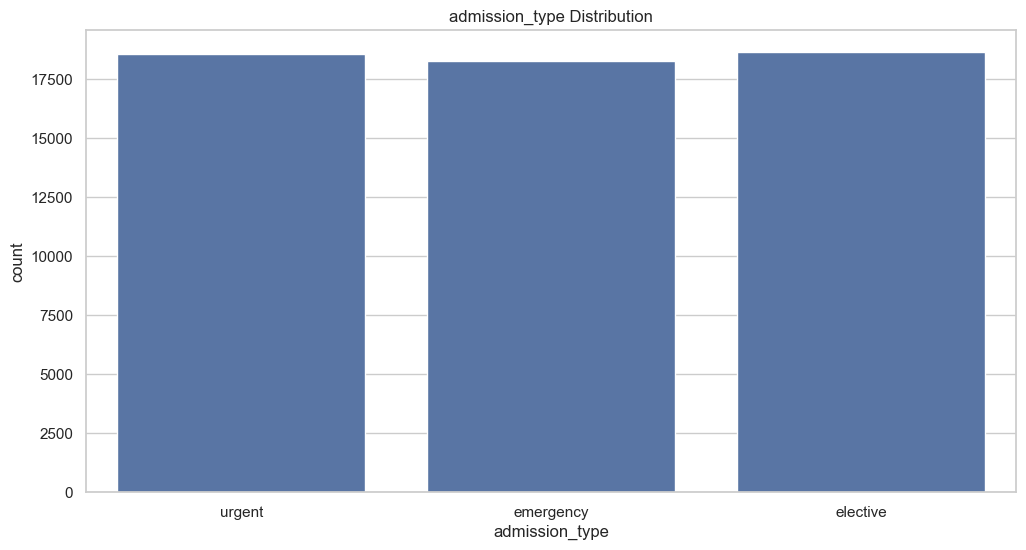

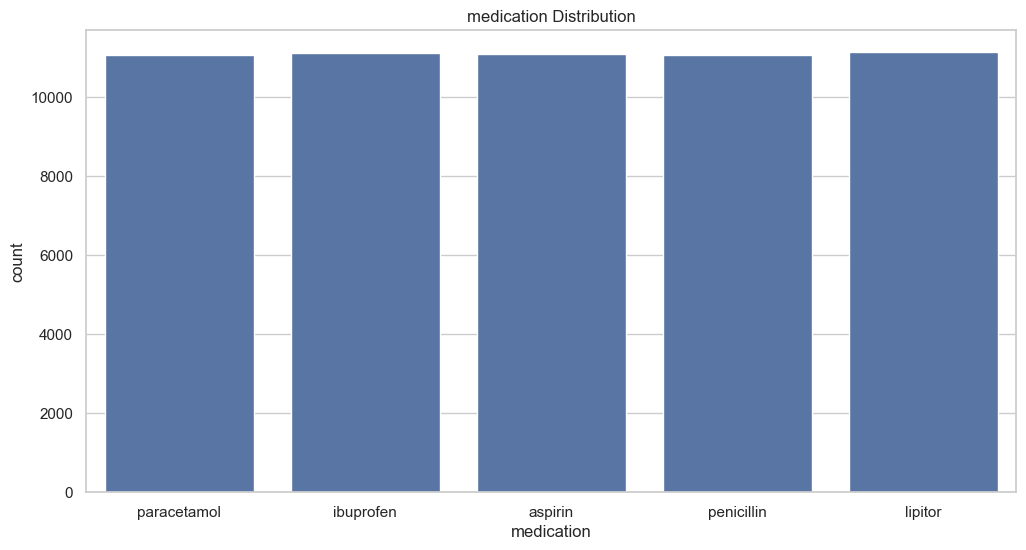

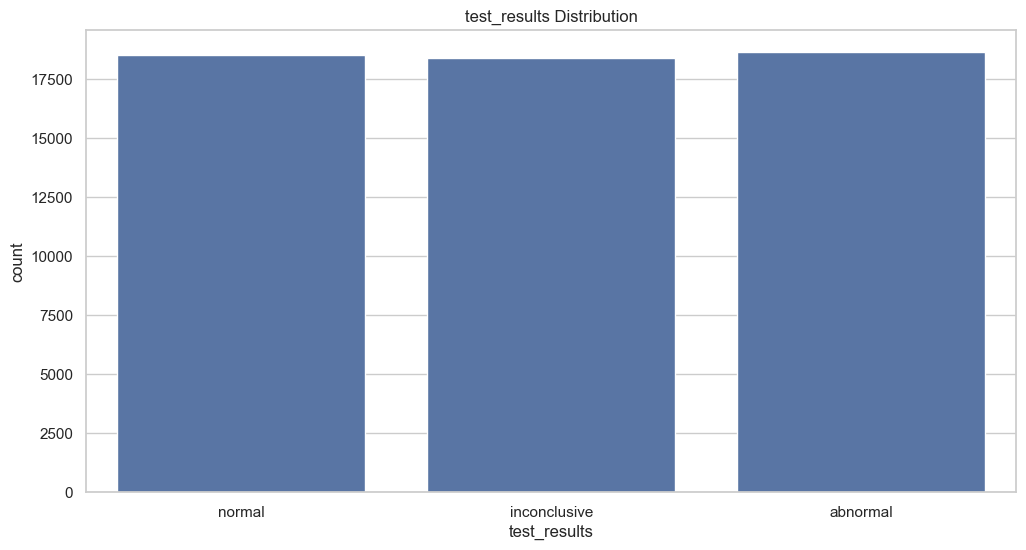

In [10]:
# Dataframe without date columns
df_raw_categ= df_raw.drop(columns=['date_of_admission', 'discharge_date', 'doctor', 'name', 'hospital', 'patient_key'])

# Loop for categorical column and show distribution
for col in df_raw_categ.select_dtypes(include=['object']).columns:
    sns.countplot(x=col, data=df_raw_categ)
    plt.title(f'{col} Distribution')
    plt.show()



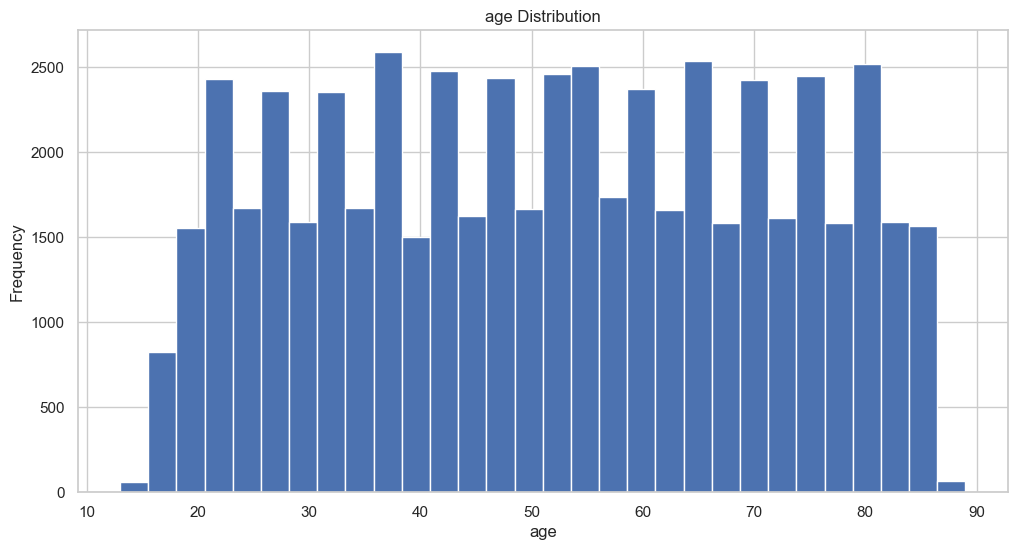

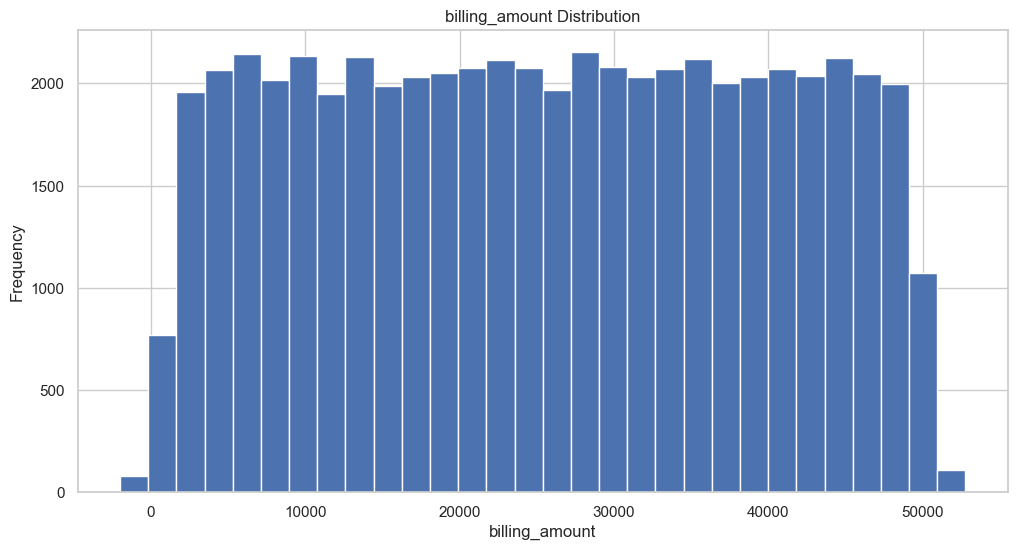

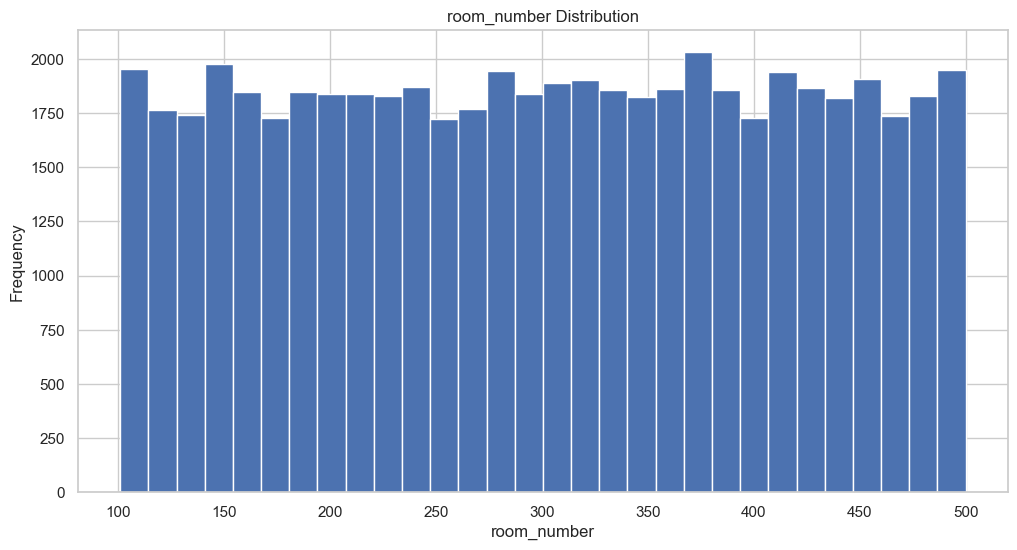

In [11]:
# Loop for numerical column and show distribution
for col in df_raw.select_dtypes(include=['number']).columns:
    df_raw[col].hist(bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

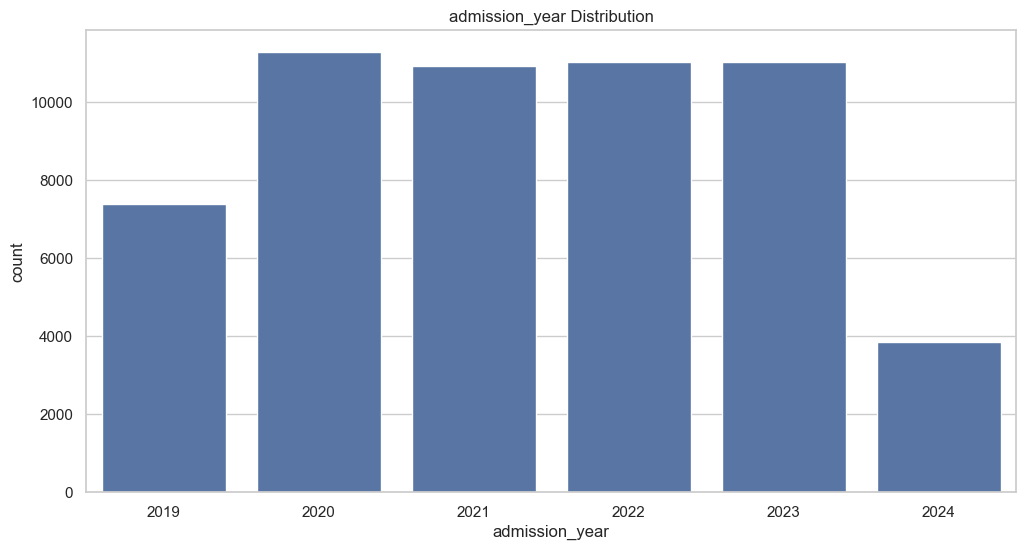

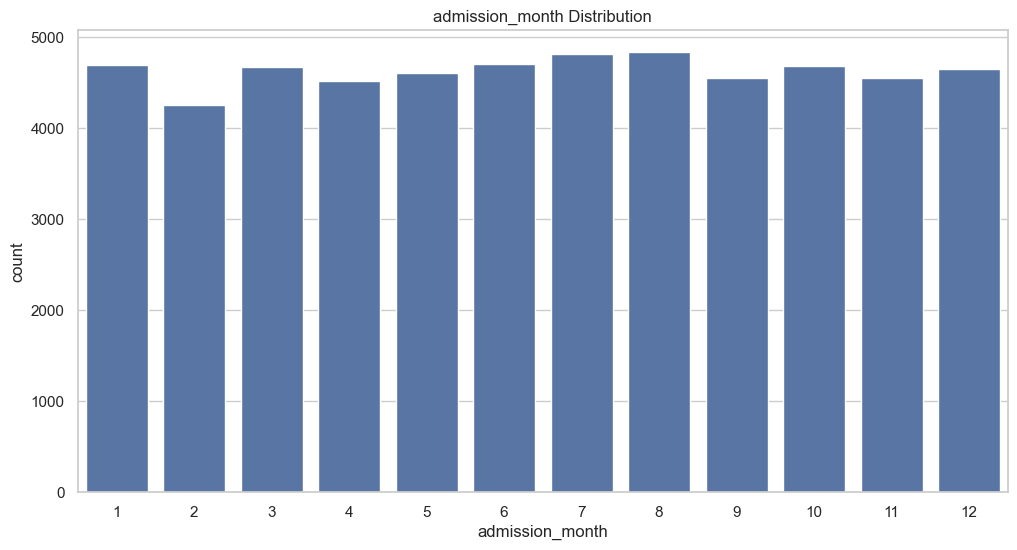

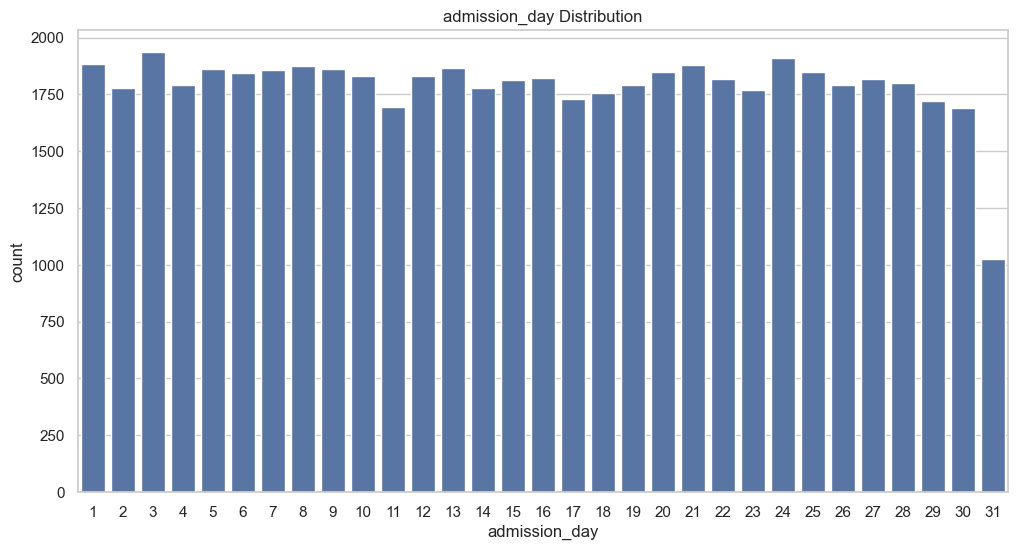

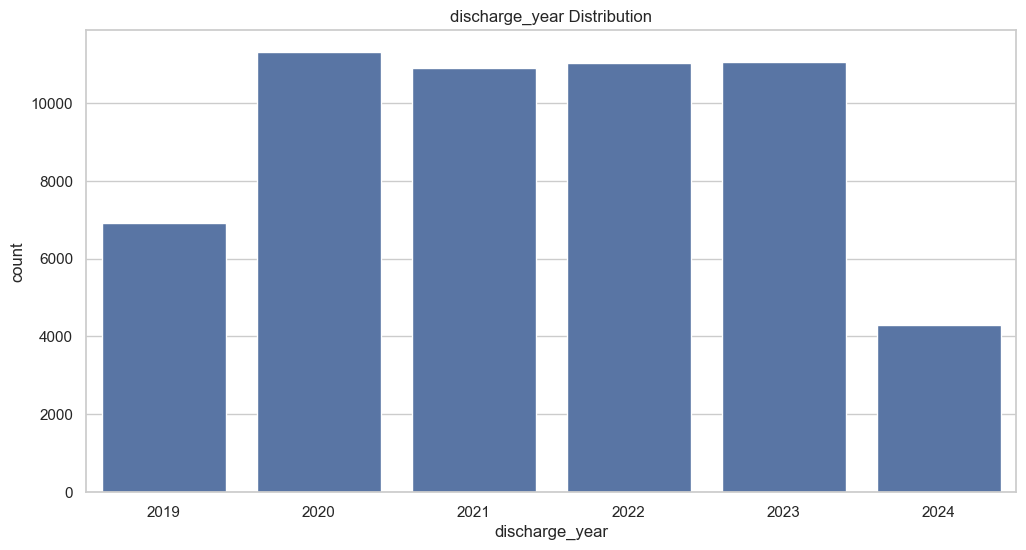

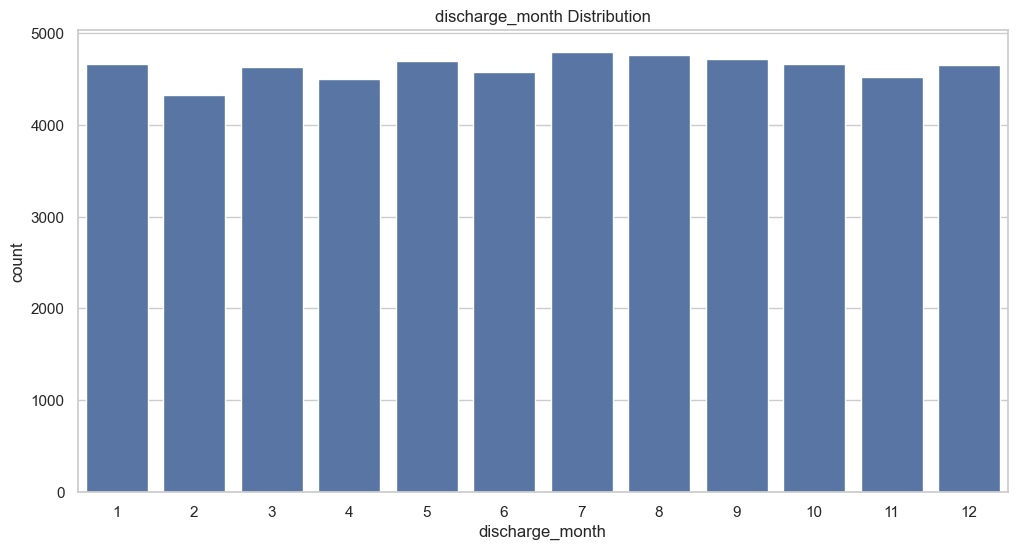

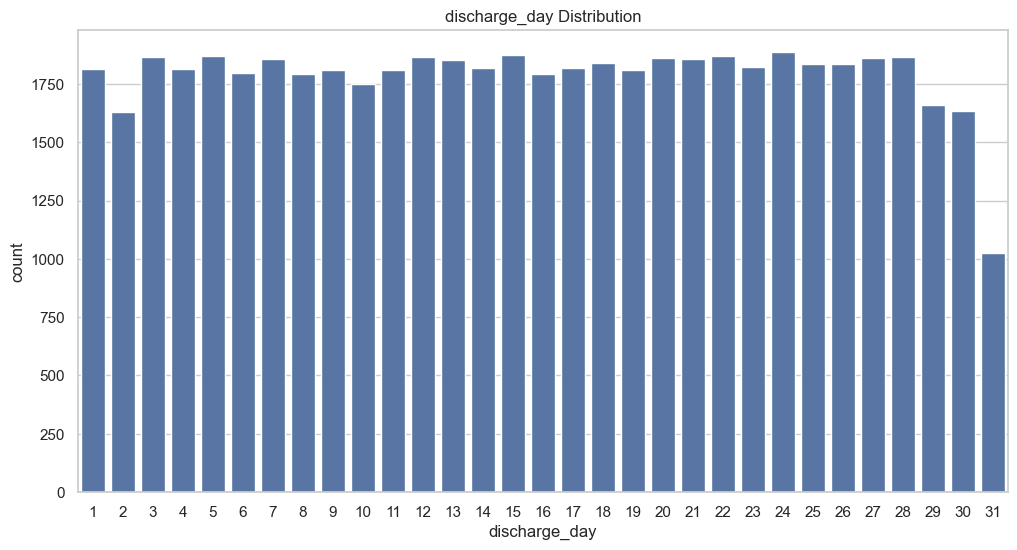

In [12]:
# Create Dataframe for checking date columns by year, month and day :
df_date = df_raw[['date_of_admission', 'discharge_date']].copy()
df_date['admission_year'] = df_date['date_of_admission'].dt.year
df_date['admission_month'] = df_date['date_of_admission'].dt.month
df_date['admission_day'] = df_date['date_of_admission'].dt.day
df_date['discharge_year'] = df_date['discharge_date'].dt.year
df_date['discharge_month'] = df_date['discharge_date'].dt.month
df_date['discharge_day'] = df_date['discharge_date'].dt.day

# Loop for date columns and show distribution
for col in df_date.columns:
    if 'year' in col or 'month' in col or 'day' in col:
        sns.countplot(x=col, data=df_date)
        plt.title(f'{col} Distribution')
        plt.show()
   

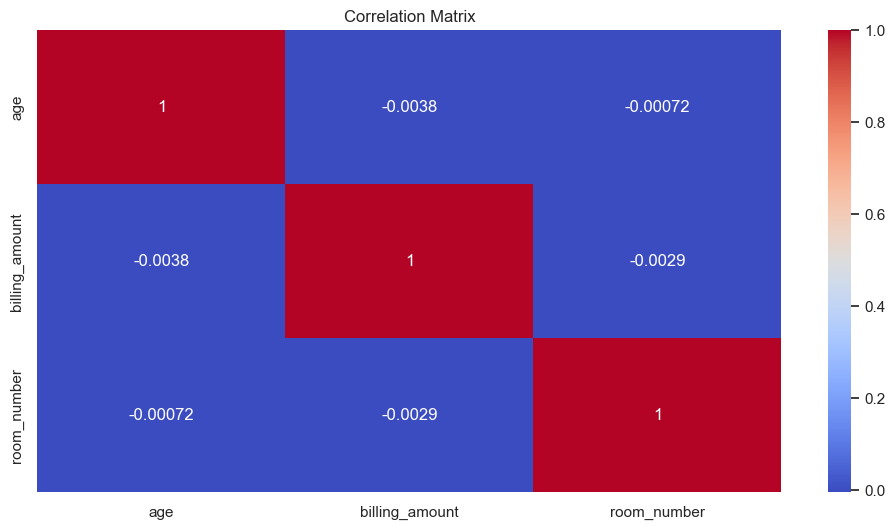

In [13]:

# Correlation matrix for numerical variables
sns.heatmap(df_raw.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


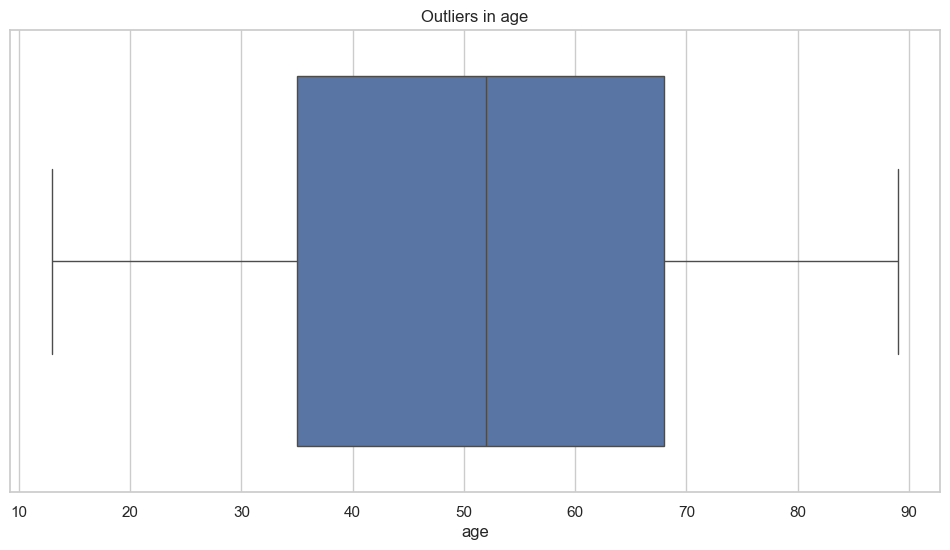

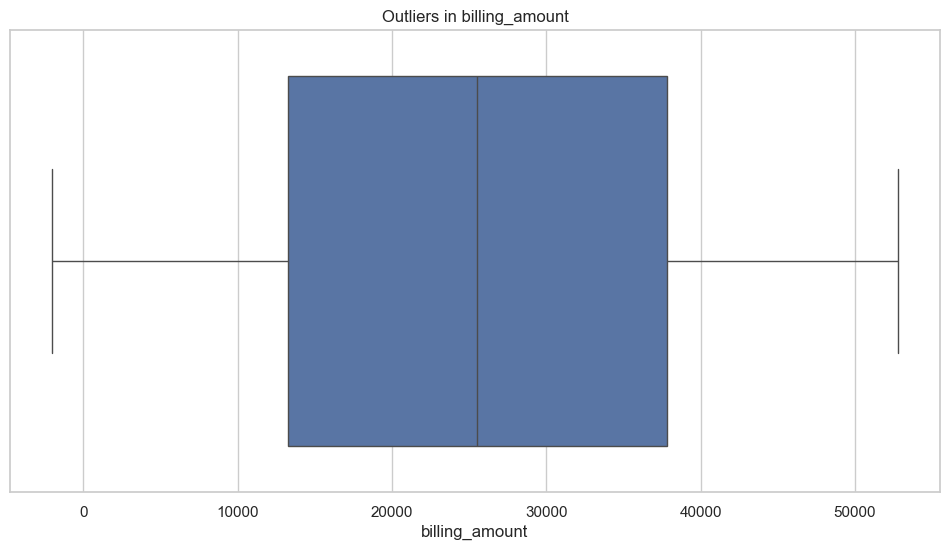

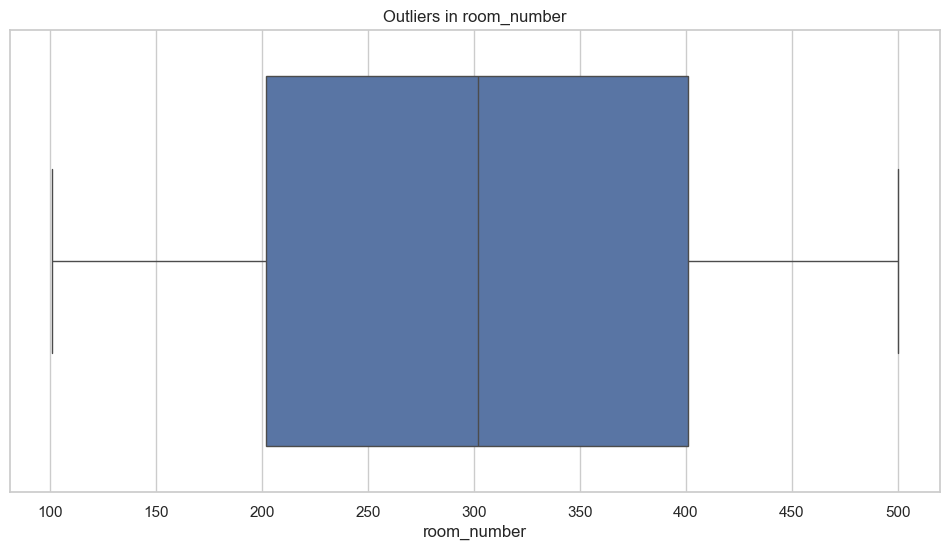

In [14]:
# Loop Boxplot for numerical column and show outliers
for col in df_raw.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df_raw[col])
    plt.title(f"Outliers in {col}")
    plt.show()

## Part 2 – Cleaned Data Analysis

In [15]:

# Load cleaned dataset
df_clean = pd.read_csv(CSV_PATH_CLEANED)
df_clean.head()


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
0,bobby_jackson,30,male,b-,cancer,2024-01-31,matthew_smith,sons_and_miller,blue_cross,18856.281306,328,urgent,2024-02-02,paracetamol,normal,bobby_jackson_2024-01-31_sons_and_miller
1,leslie_terry,62,male,a+,obesity,2019-08-20,samantha_davies,kim_inc,medicare,33643.327287,265,emergency,2019-08-26,ibuprofen,inconclusive,leslie_terry_2019-08-20_kim_inc
2,danny_smith,76,female,a-,obesity,2022-09-22,tiffany_mitchell,cook_plc,aetna,27955.096079,205,emergency,2022-10-07,aspirin,normal,danny_smith_2022-09-22_cook_plc
3,andrew_watts,28,female,o+,diabetes,2020-11-18,kevin_wells,hernandez_rogers_and_vang,medicare,37909.782410,450,elective,2020-12-18,ibuprofen,abnormal,andrew_watts_2020-11-18_hernandez_rogers_and_vang
4,adrienne_bell,43,female,ab+,cancer,2022-09-19,kathleen_hanna,white-white,aetna,14238.317814,458,urgent,2022-10-09,penicillin,abnormal,adrienne_bell_2022-09-19_white-white


In [16]:

# Info and stats
df_clean.info()
df_clean.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                50000 non-null  object 
 1   age                 50000 non-null  int64  
 2   gender              50000 non-null  object 
 3   blood_type          50000 non-null  object 
 4   medical_condition   50000 non-null  object 
 5   date_of_admission   50000 non-null  object 
 6   doctor              50000 non-null  object 
 7   hospital            50000 non-null  object 
 8   insurance_provider  50000 non-null  object 
 9   billing_amount      50000 non-null  float64
 10  room_number         50000 non-null  int64  
 11  admission_type      50000 non-null  object 
 12  discharge_date      50000 non-null  object 
 13  medication          50000 non-null  object 
 14  test_results        50000 non-null  object 
 15  patient_key         50000 non-null  object 
dtypes: f

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
count,50000,50000.000000,50000,50000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000,50000,50000,50000,50000
unique,40235,NaN,2,8,6,1827,40341,39876,5,NaN,NaN,3,1856,5,3,50000
top,michael_williams,NaN,female,ab+,arthritis,2024-03-16,michael_smith,llc_smith,cigna,NaN,NaN,elective,2020-03-15,lipitor,abnormal,bobby_jackson_2024-01-31_sons_and_miller
freq,22,NaN,25011,6291,8439,45,24,40,10091,NaN,NaN,16827,45,10032,16772,1
mean,NaN,51.580360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25555.691557,301.032260,NaN,NaN,NaN,NaN,NaN
std,NaN,19.582194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14215.932247,115.228819,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2008.492140,101.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13239.403094,202.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25541.302839,302.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37853.996819,400.000000,NaN,NaN,NaN,NaN,NaN


In [17]:
# Transform date columns to datetime format
for date_col in ['date_of_admission', 'discharge_date']:   # Loop through expected date columns
    if date_col in df_clean.columns:                            # Check if the column exists
        df_clean[date_col] = pd.to_datetime(df_clean[date_col], errors='coerce')  # Convert to datetime, coerce errors to NaT

In [18]:
# Null values count
print("Null values count:")
print(df_clean.isnull().sum())
display(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

# Check duplicates
print("Duplicate rows count:", df_clean.duplicated().sum())
display(df_clean[df_clean.duplicated(keep=False)].sort_values(by=list(df_clean.columns)))


Null values count:
name                  0
age                   0
gender                0
blood_type            0
medical_condition     0
date_of_admission     0
doctor                0
hospital              0
insurance_provider    0
billing_amount        0
room_number           0
admission_type        0
discharge_date        0
medication            0
test_results          0
patient_key           0
dtype: int64


Series([], dtype: int64)

Duplicate rows count: 0


,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key


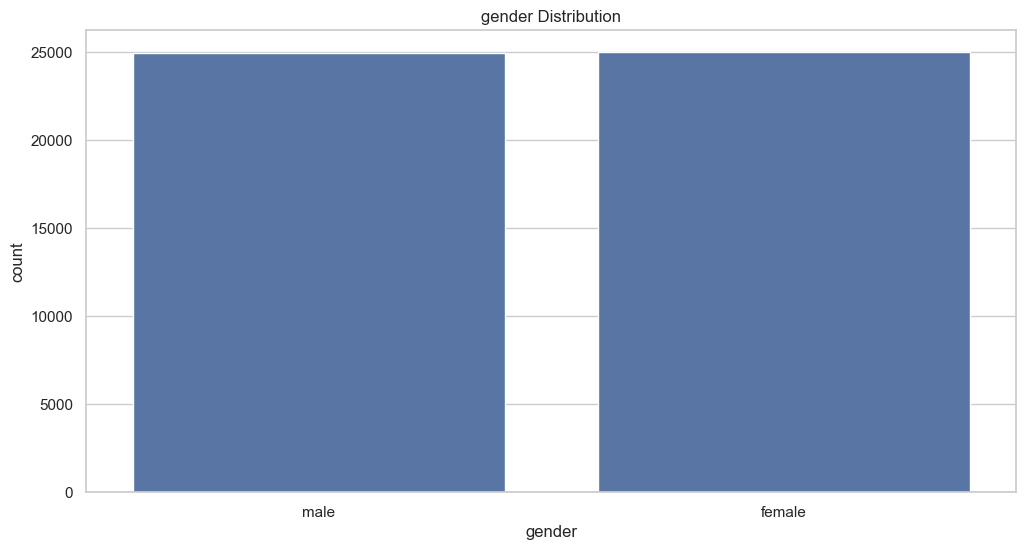

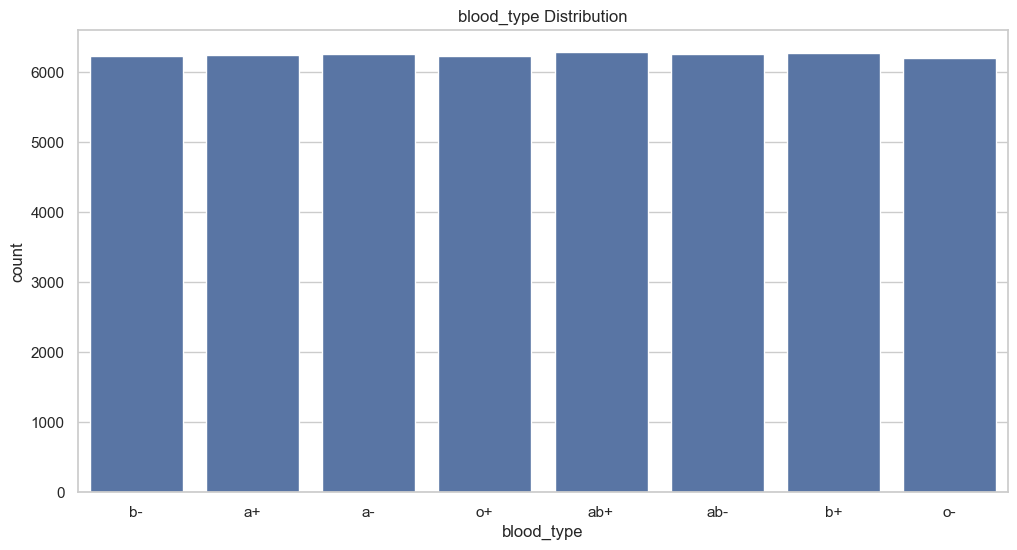

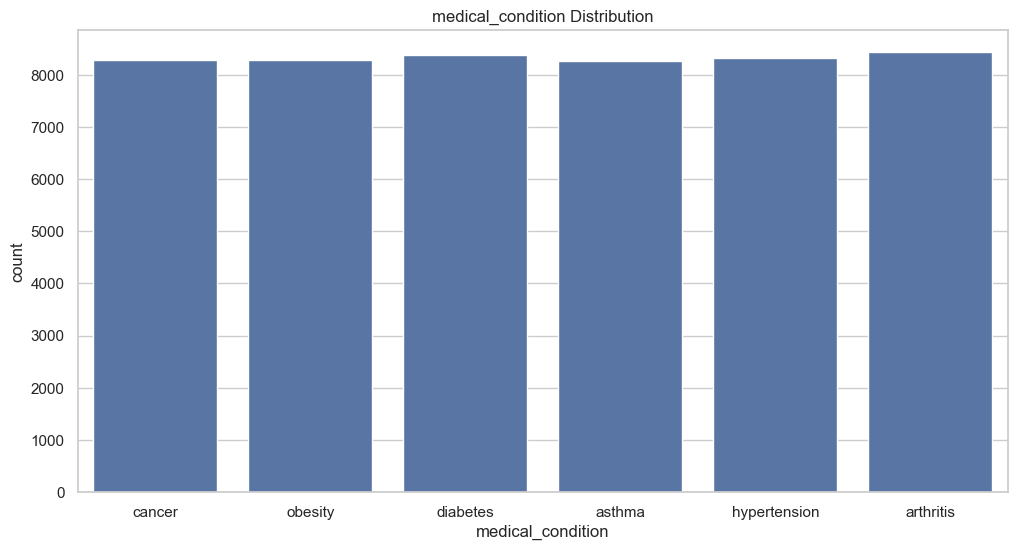

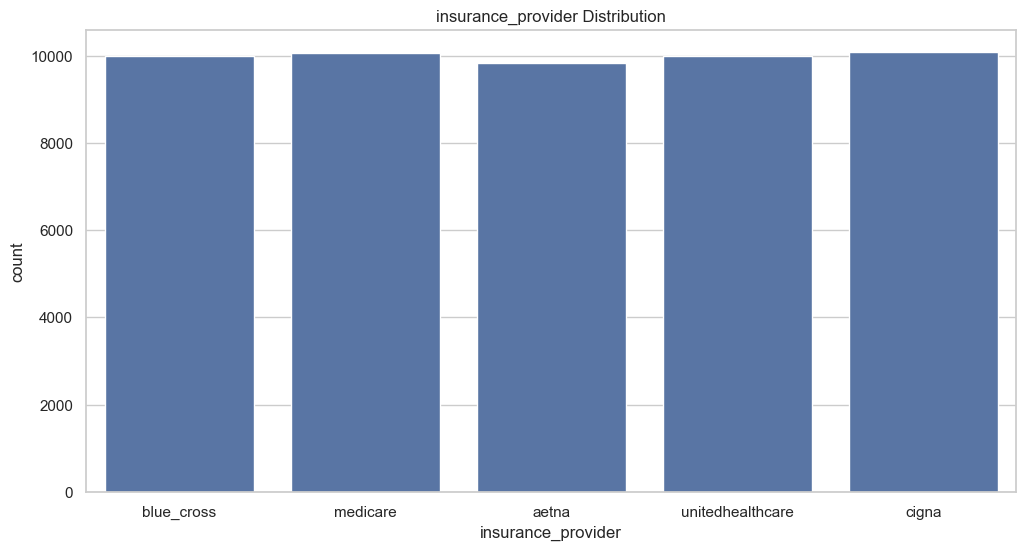

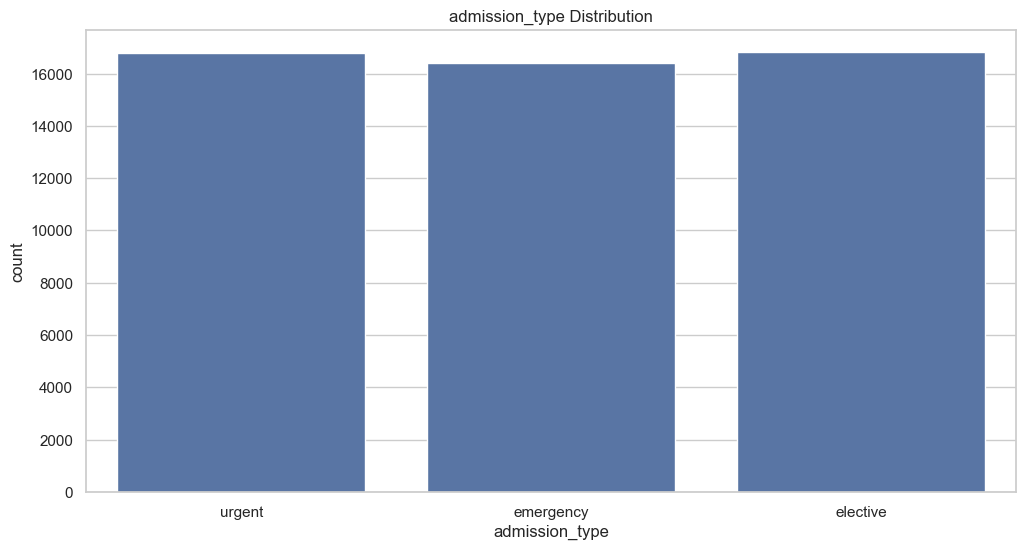

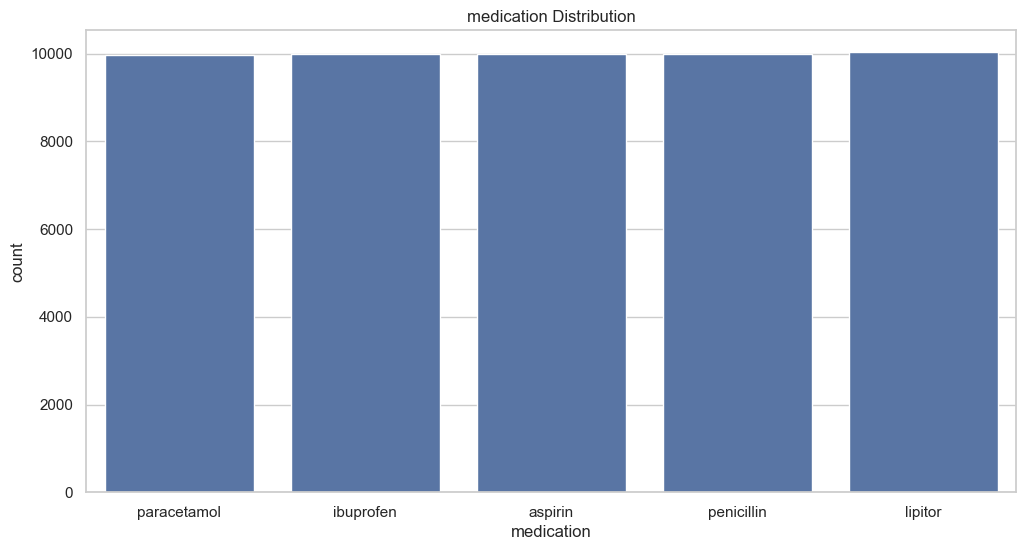

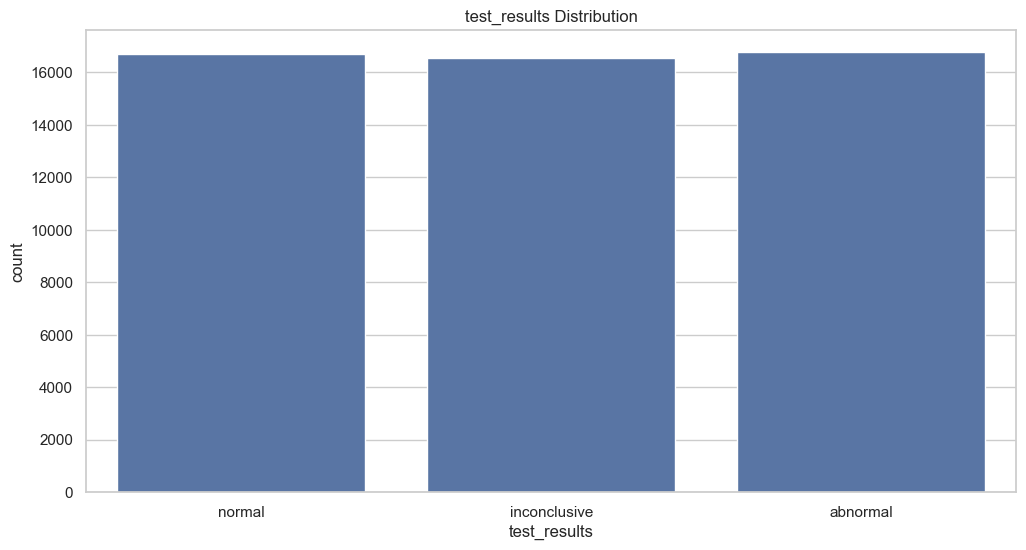

In [19]:
# Dataframe without date columns
df_clean_categ= df_clean.drop(columns=['date_of_admission', 'discharge_date', 'doctor', 'name', 'hospital', 'patient_key'])

# Loop for categorical column and show distribution
for col in df_clean_categ.select_dtypes(include=['object']).columns:
    sns.countplot(x=col, data=df_clean_categ)
    plt.title(f'{col} Distribution')
    plt.show()

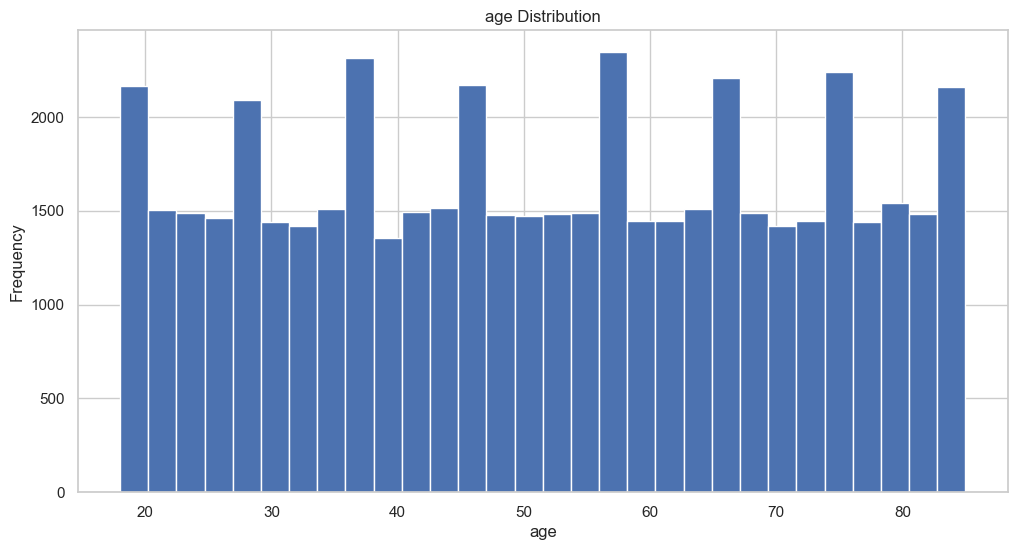

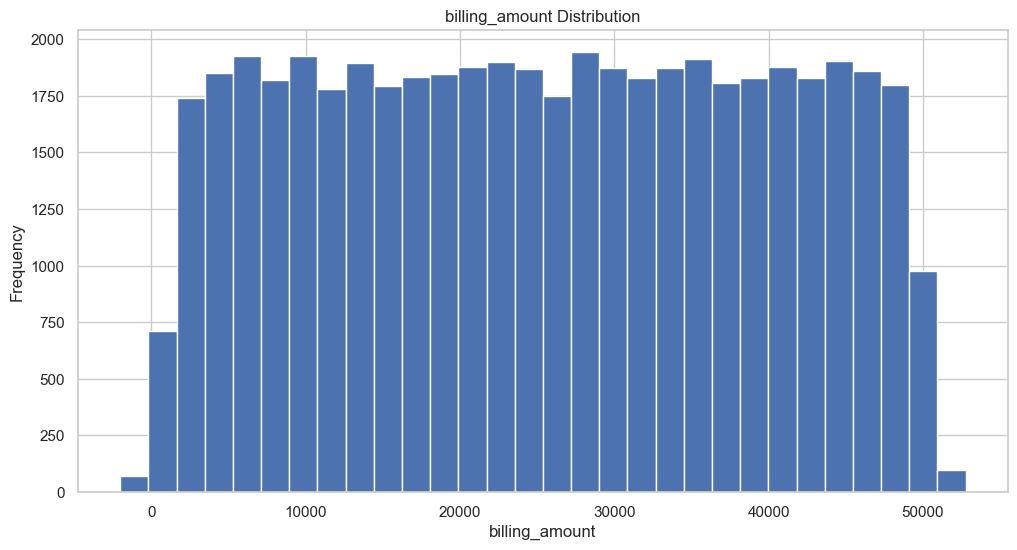

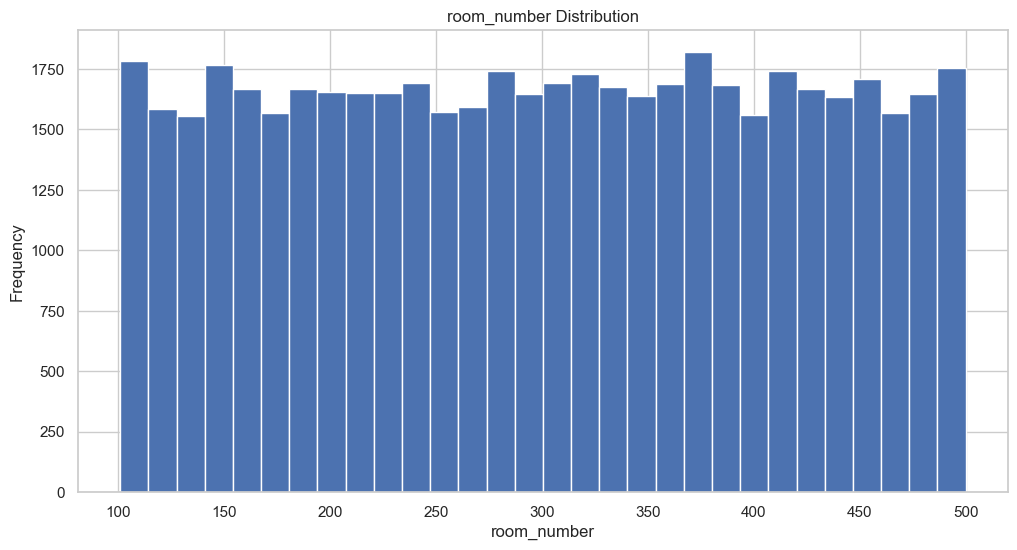

In [20]:
# Loop for numerical column and show distribution
for col in df_clean.select_dtypes(include=['number']).columns:
    df_clean[col].hist(bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

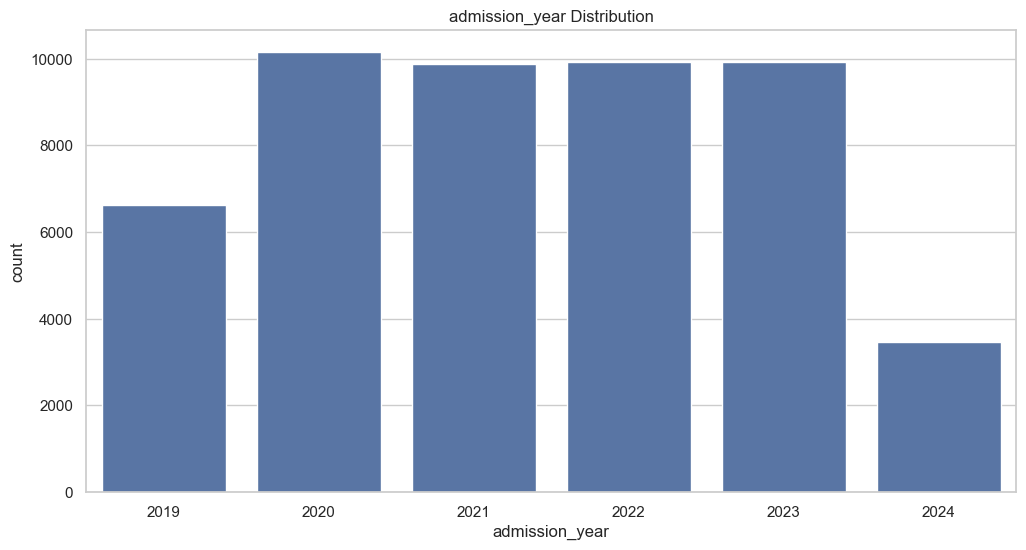

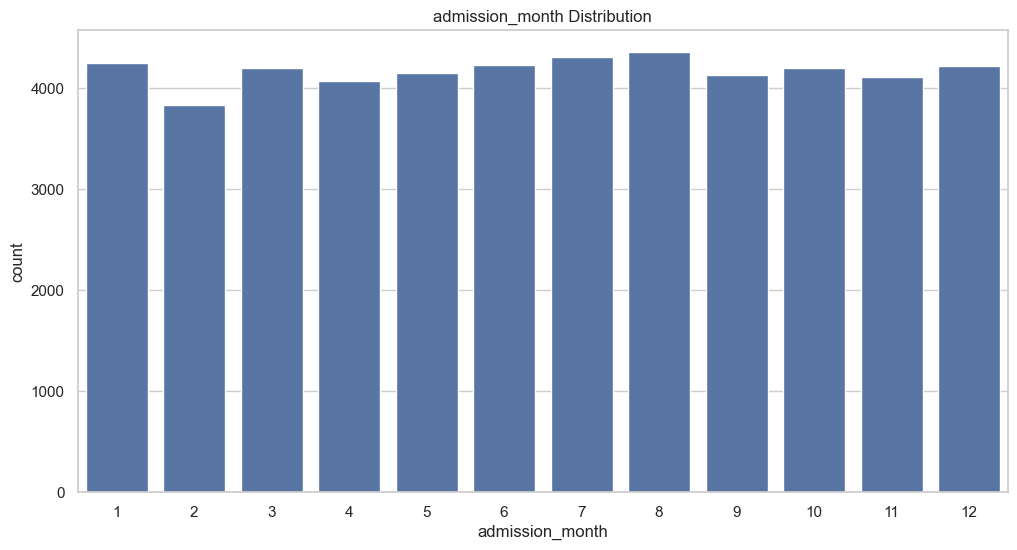

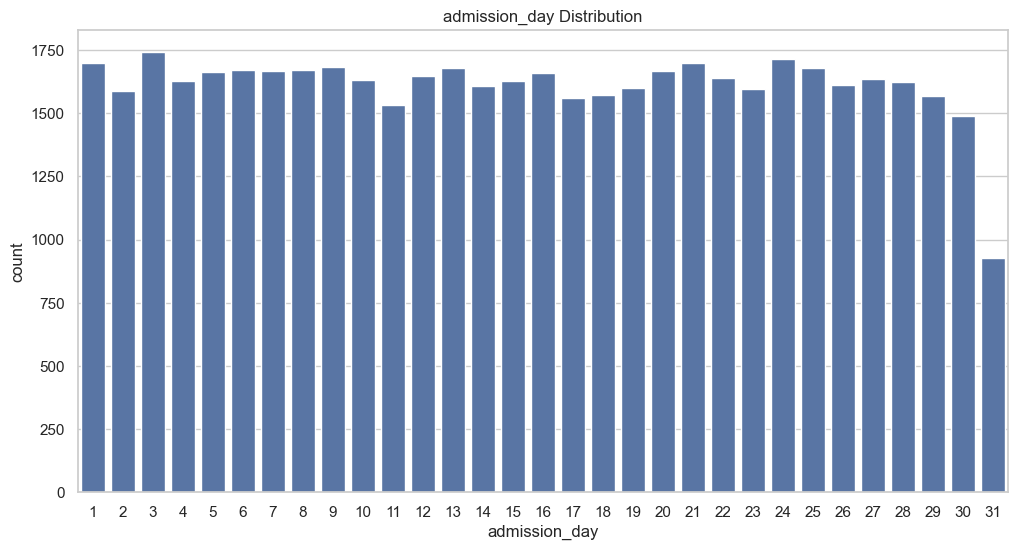

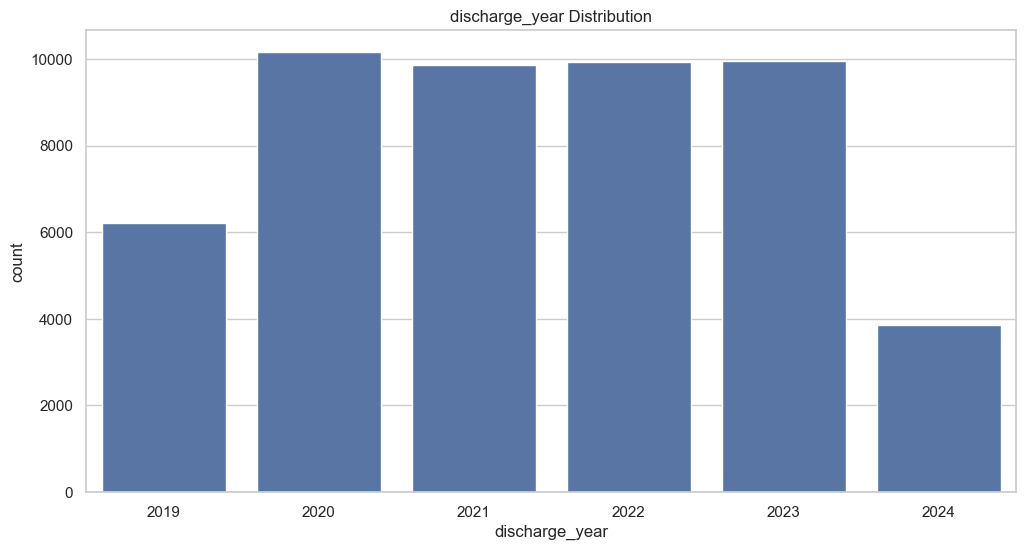

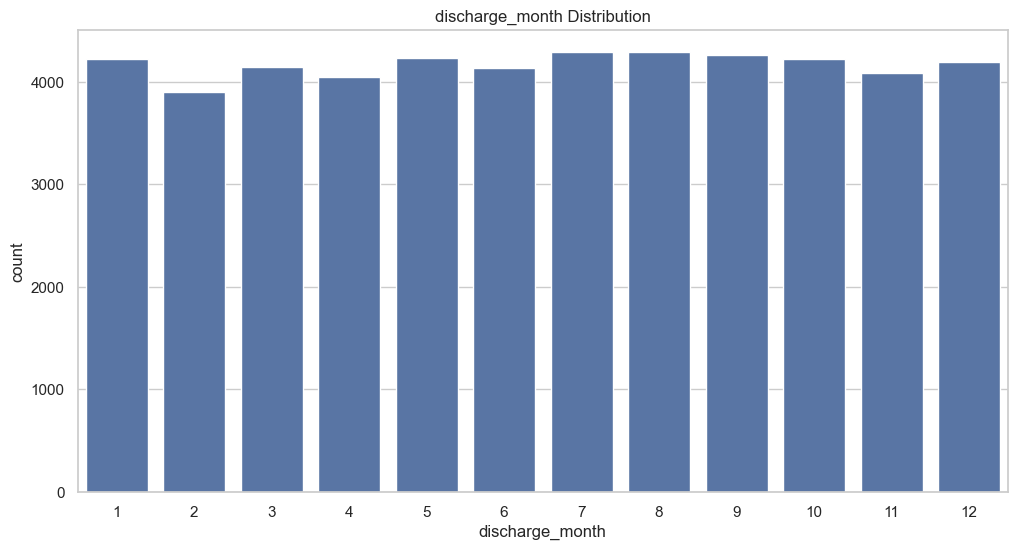

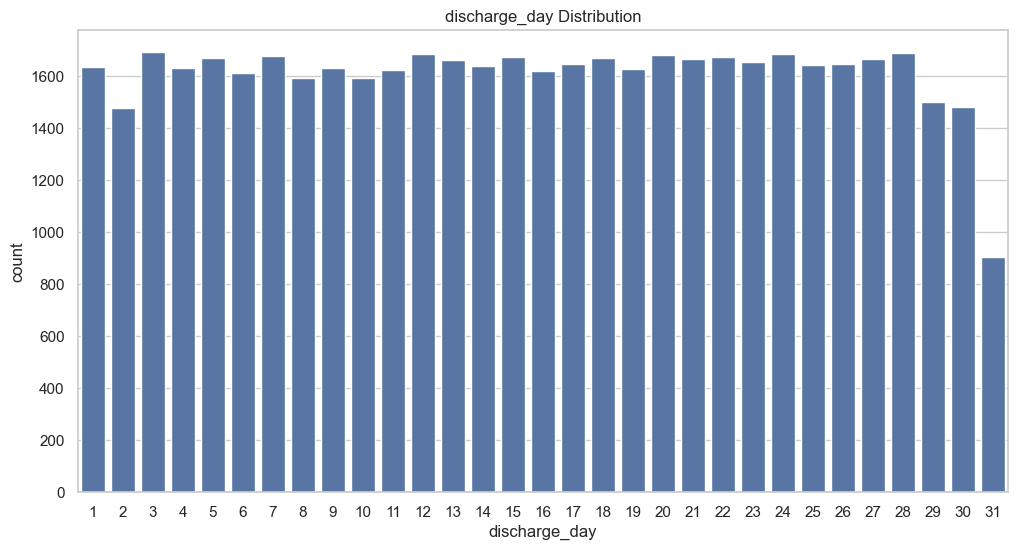

In [21]:
# Create Dataframe for checking date columns by year, month and day :
df_date = df_clean[['date_of_admission', 'discharge_date']].copy()
df_date['admission_year'] = df_clean['date_of_admission'].dt.year
df_date['admission_month'] = df_clean['date_of_admission'].dt.month
df_date['admission_day'] = df_clean['date_of_admission'].dt.day
df_date['discharge_year'] = df_clean['discharge_date'].dt.year
df_date['discharge_month'] = df_clean['discharge_date'].dt.month
df_date['discharge_day'] = df_clean['discharge_date'].dt.day

# Loop for date columns and show distribution
for col in df_date.columns:
    if 'year' in col or 'month' in col or 'day' in col:
        sns.countplot(x=col, data=df_date)
        plt.title(f'{col} Distribution')
        plt.show()

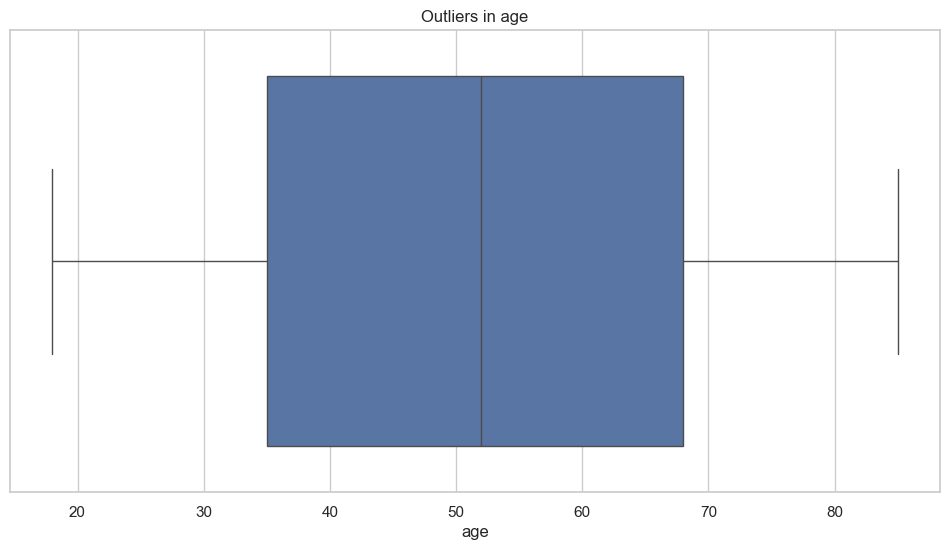

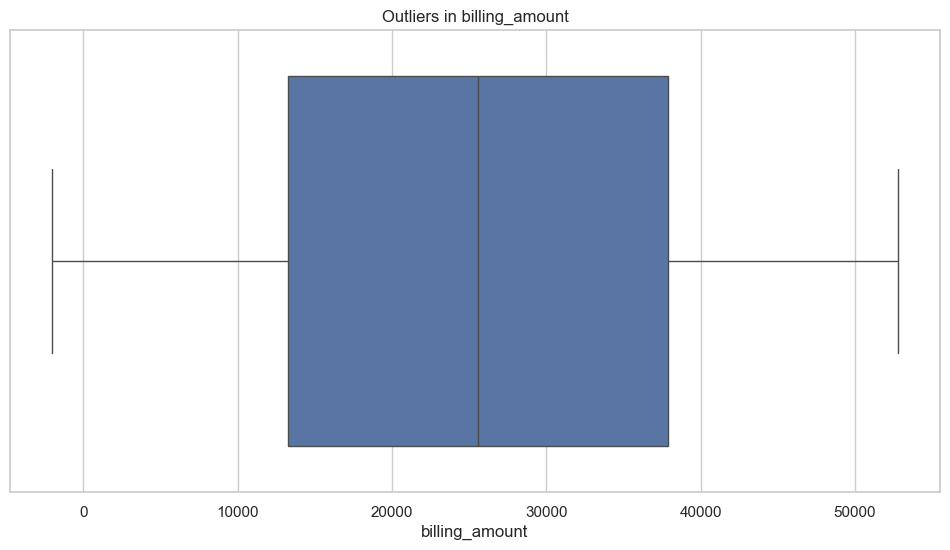

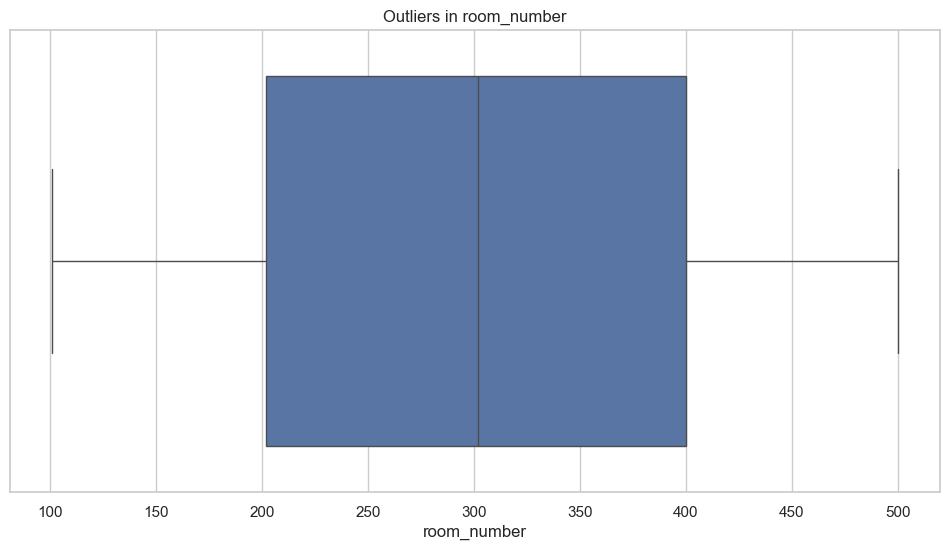

In [22]:
# Loop Boxplot for numerical column and show outliers
for col in df_clean.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df_clean[col])
    plt.title(f"Outliers in {col}")
    plt.show()

##  Part 3 – MongoDB Exported Data Analysis

In [23]:

# Connect to MongoDB using ADMIN role

uri = os.getenv("ADMIN_URI_LOCAL")  # Use environment variable if set, otherwise use default

client = MongoClient(uri)  # Connect to MongoDB using the URI
db = client["healthcare_db"]
collection = db["patients"]

# Load all documents into a DataFrame
records = list(collection.find({}))
df_mongo = pd.DataFrame(records)
df_mongo.head()


,_id,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
0,6863df4e830319832cd8263b,bobby_jackson,30,male,b-,cancer,2024-01-31,matthew_smith,sons_and_miller,blue_cross,18856.281306,328,urgent,2024-02-02,paracetamol,normal,bobby_jackson_2024-01-31_sons_and_miller
1,6863df4e830319832cd8263c,leslie_terry,62,male,a+,obesity,2019-08-20,samantha_davies,kim_inc,medicare,33643.327287,265,emergency,2019-08-26,ibuprofen,inconclusive,leslie_terry_2019-08-20_kim_inc
2,6863df4e830319832cd8263d,danny_smith,76,female,a-,obesity,2022-09-22,tiffany_mitchell,cook_plc,aetna,27955.096079,205,emergency,2022-10-07,aspirin,normal,danny_smith_2022-09-22_cook_plc
3,6863df4e830319832cd8263e,andrew_watts,28,female,o+,diabetes,2020-11-18,kevin_wells,hernandez_rogers_and_vang,medicare,37909.782410,450,elective,2020-12-18,ibuprofen,abnormal,andrew_watts_2020-11-18_hernandez_rogers_and_vang
4,6863df4e830319832cd8263f,adrienne_bell,43,female,ab+,cancer,2022-09-19,kathleen_hanna,white-white,aetna,14238.317814,458,urgent,2022-10-09,penicillin,abnormal,adrienne_bell_2022-09-19_white-white


In [24]:
# Info and stats
df_mongo.info()
df_mongo.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   _id                 50000 non-null  object        
 1   name                50000 non-null  object        
 2   age                 50000 non-null  int64         
 3   gender              50000 non-null  object        
 4   blood_type          50000 non-null  object        
 5   medical_condition   50000 non-null  object        
 6   date_of_admission   50000 non-null  datetime64[ns]
 7   doctor              50000 non-null  object        
 8   hospital            50000 non-null  object        
 9   insurance_provider  50000 non-null  object        
 10  billing_amount      50000 non-null  float64       
 11  room_number         50000 non-null  int64         
 12  admission_type      50000 non-null  object        
 13  discharge_date      50000 non-null  datetime64

,_id,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key
count,50000,50000,50000.000000,50000,50000,50000,50000,50000,50000,50000,50000.000000,50000.000000,50000,50000,50000,50000,50000
unique,50000,40235,NaN,2,8,6,NaN,40341,39876,5,NaN,NaN,3,NaN,5,3,50000
top,6863df4e830319832cd8263b,michael_williams,NaN,female,ab+,arthritis,NaN,michael_smith,llc_smith,cigna,NaN,NaN,elective,NaN,lipitor,abnormal,bobby_jackson_2024-01-31_sons_and_miller
freq,1,22,NaN,25011,6291,8439,NaN,24,40,10091,NaN,NaN,16827,NaN,10032,16772,1
mean,NaN,NaN,51.580360,NaN,NaN,NaN,2021-11-01 07:31:59.231999744,NaN,NaN,NaN,25555.691557,301.032260,NaN,2021-11-16 19:32:47.616000256,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,2019-05-08 00:00:00,NaN,NaN,NaN,-2008.492140,101.000000,NaN,2019-05-09 00:00:00,NaN,NaN,NaN
25%,NaN,NaN,35.000000,NaN,NaN,NaN,2020-07-28 18:00:00,NaN,NaN,NaN,13239.403094,202.000000,NaN,2020-08-13 00:00:00,NaN,NaN,NaN
50%,NaN,NaN,52.000000,NaN,NaN,NaN,2021-11-01 00:00:00,NaN,NaN,NaN,25541.302839,302.000000,NaN,2021-11-17 00:00:00,NaN,NaN,NaN
75%,NaN,NaN,68.000000,NaN,NaN,NaN,2023-02-02 00:00:00,NaN,NaN,NaN,37853.996819,400.000000,NaN,2023-02-18 00:00:00,NaN,NaN,NaN
max,NaN,NaN,85.000000,NaN,NaN,NaN,2024-05-07 00:00:00,NaN,NaN,NaN,52764.276736,500.000000,NaN,2024-06-06 00:00:00,NaN,NaN,NaN


In [25]:
# Null values count
print("Null values count:")
print(df_mongo.isnull().sum())
display(df_mongo.isnull().sum()[df_mongo.isnull().sum() > 0])

# Check duplicates
print("Duplicate rows count:", df_mongo.duplicated().sum())
display(df_mongo[df_mongo.duplicated(keep=False)].sort_values(by=list(df_mongo.columns)))


Null values count:
_id                   0
name                  0
age                   0
gender                0
blood_type            0
medical_condition     0
date_of_admission     0
doctor                0
hospital              0
insurance_provider    0
billing_amount        0
room_number           0
admission_type        0
discharge_date        0
medication            0
test_results          0
patient_key           0
dtype: int64


Series([], dtype: int64)

Duplicate rows count: 0


,_id,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results,patient_key


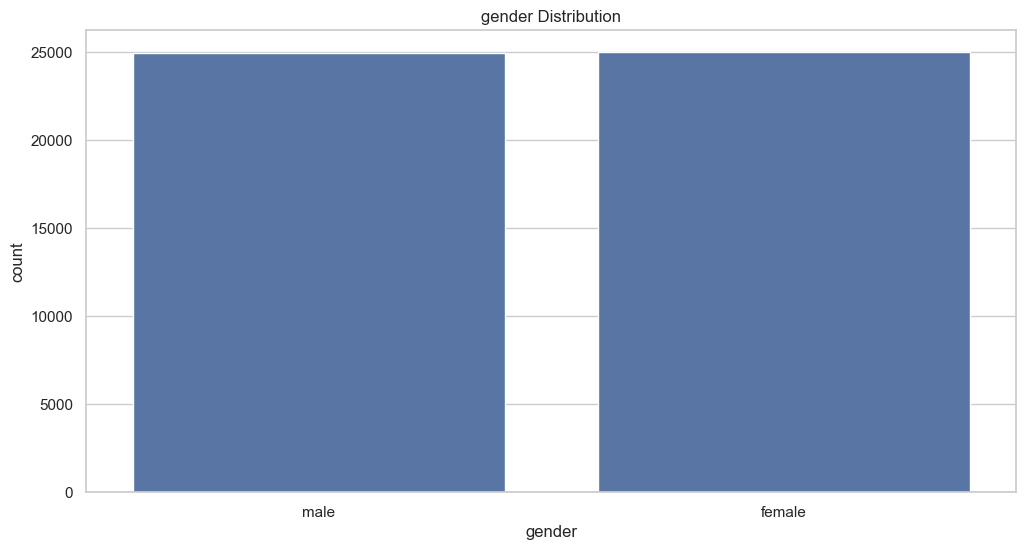

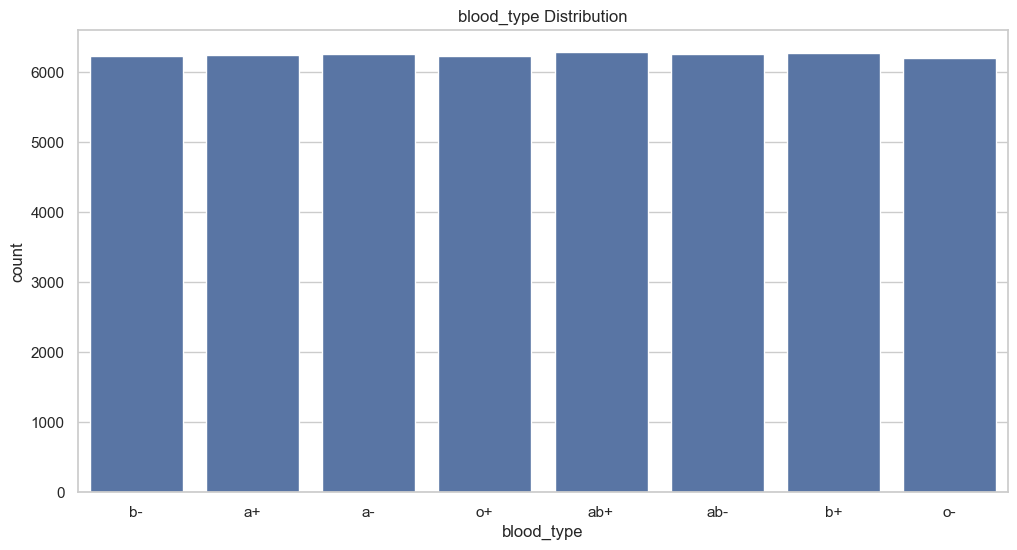

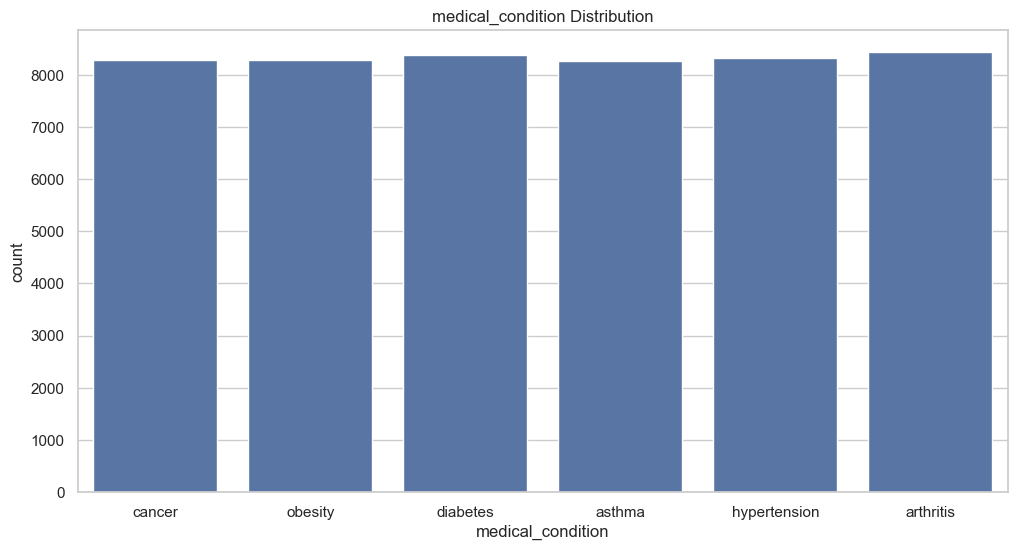

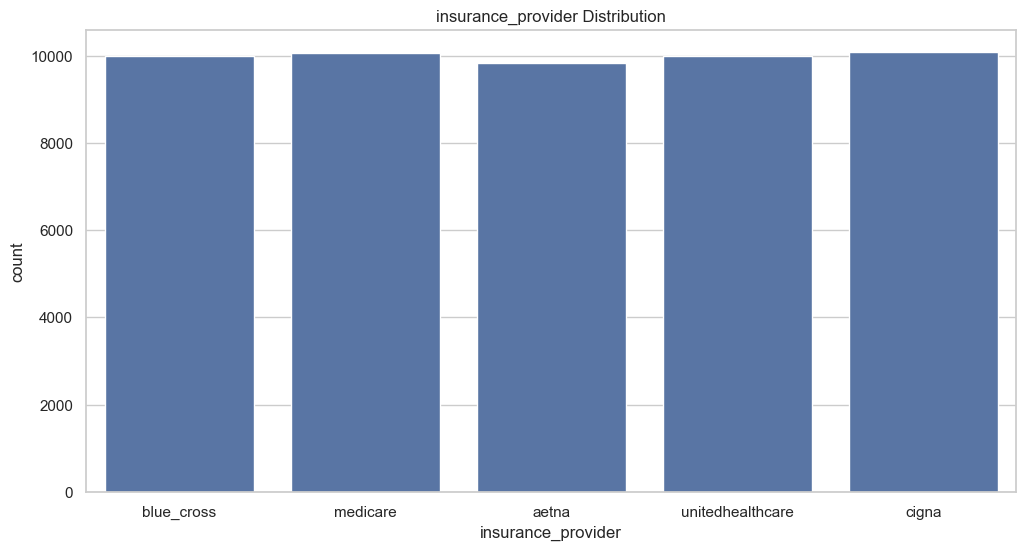

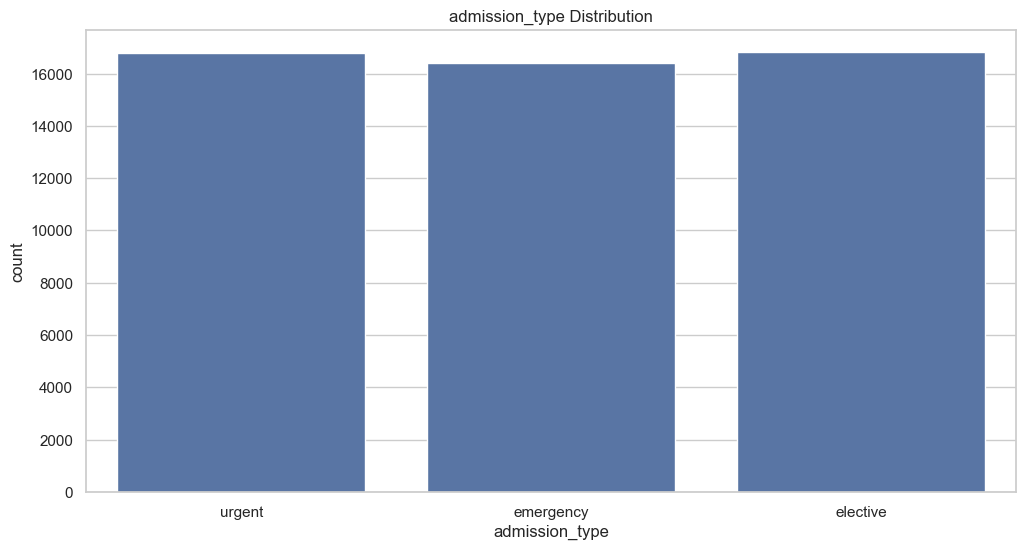

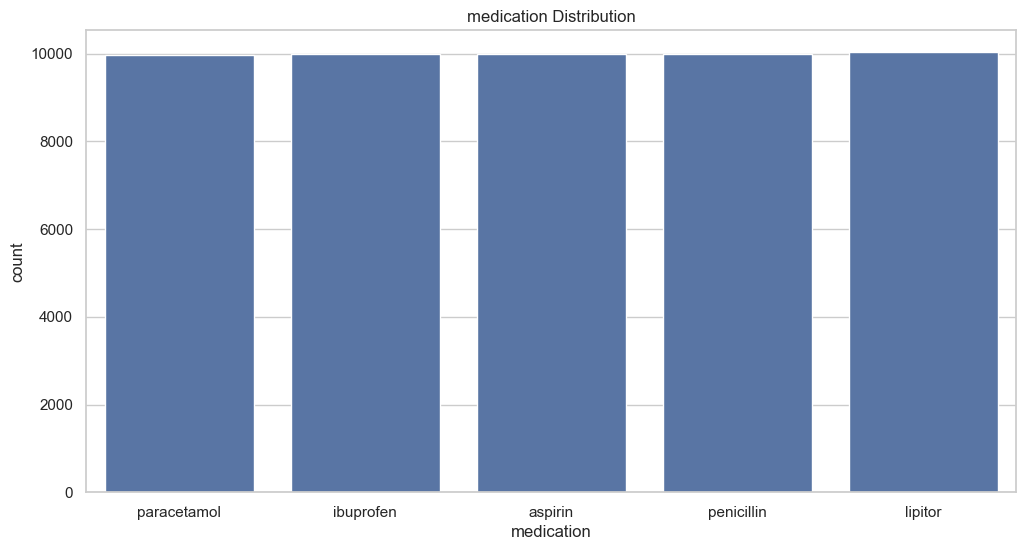

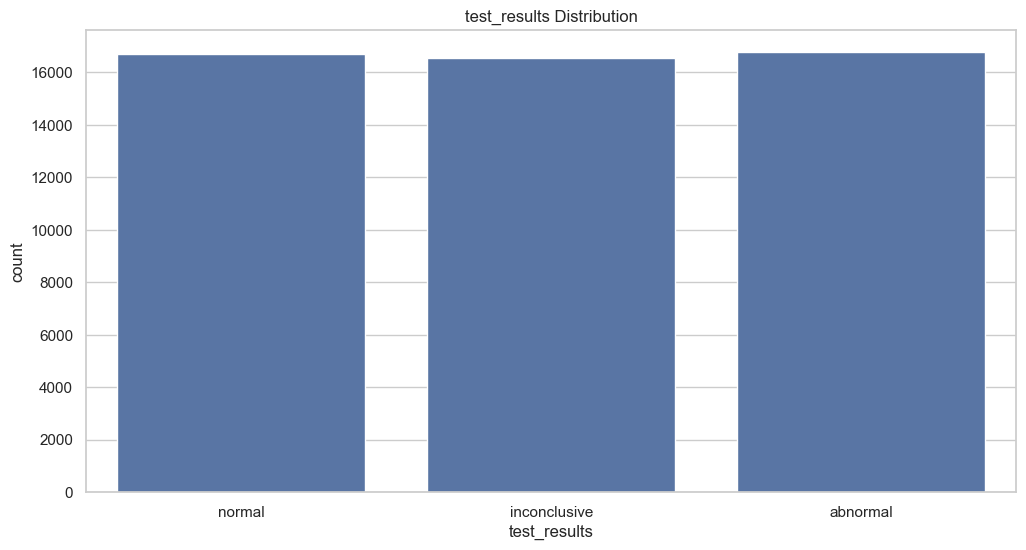

In [26]:
# Dataframe without date columns
df_mongo_categ= df_mongo.drop(columns=['_id', 'date_of_admission', 'discharge_date', 'doctor', 'name', 'hospital', 'patient_key'])

# Loop for categorical column and show distribution
for col in df_mongo_categ.select_dtypes(include=['object']).columns:
    sns.countplot(x=col, data=df_mongo_categ)
    plt.title(f'{col} Distribution')
    plt.show()


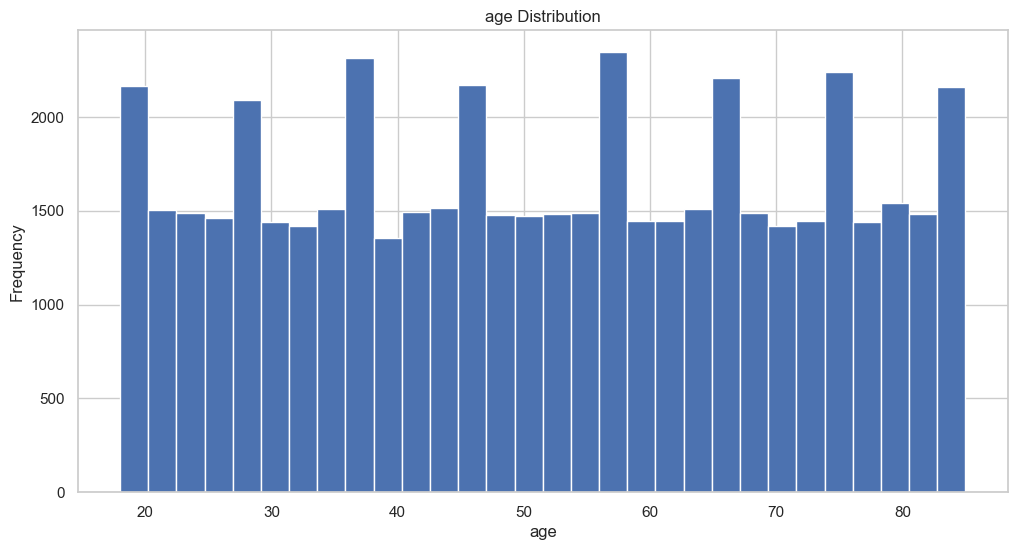

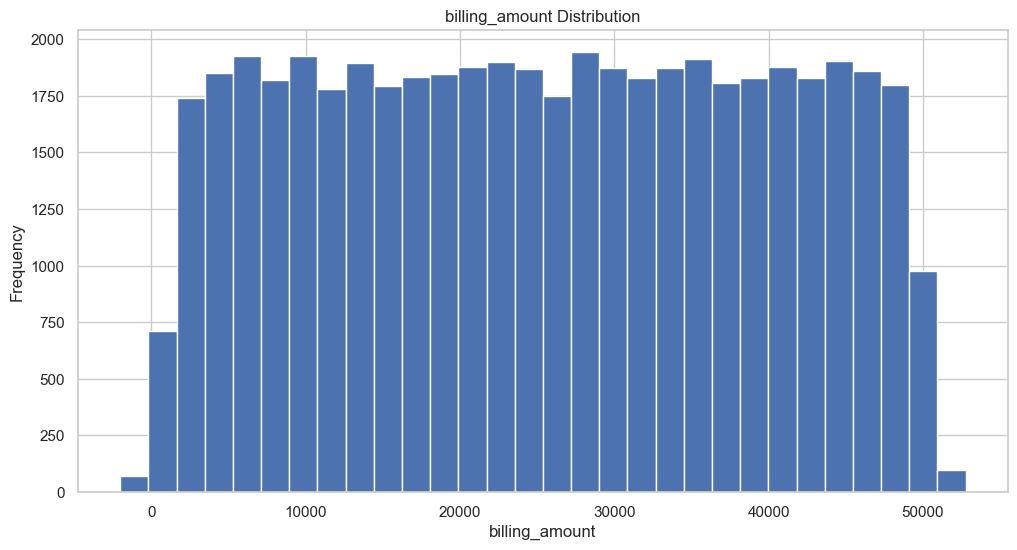

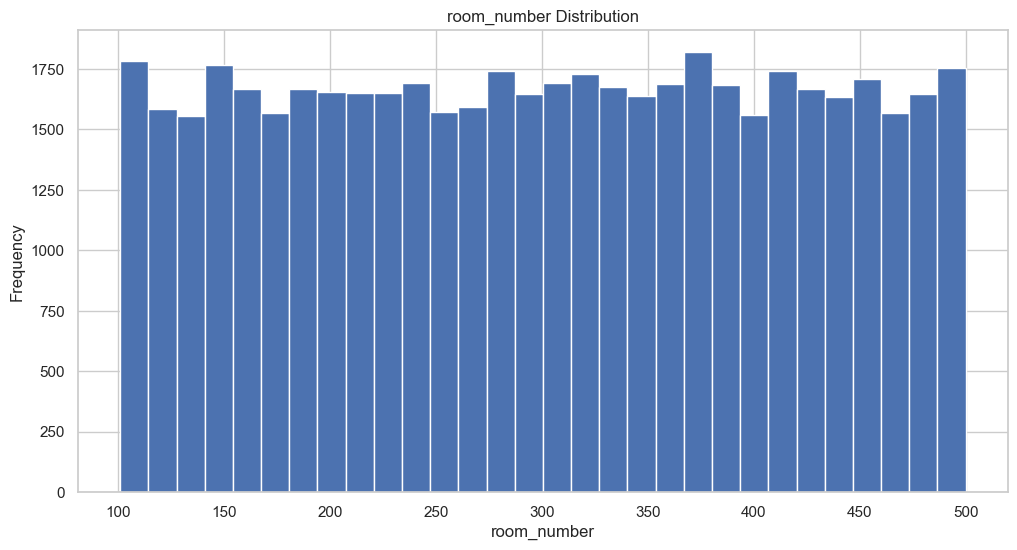

In [27]:

# Loop for numerical column and show distribution
for col in df_mongo.select_dtypes(include=['number']).columns:
    df_mongo[col].hist(bins=30)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


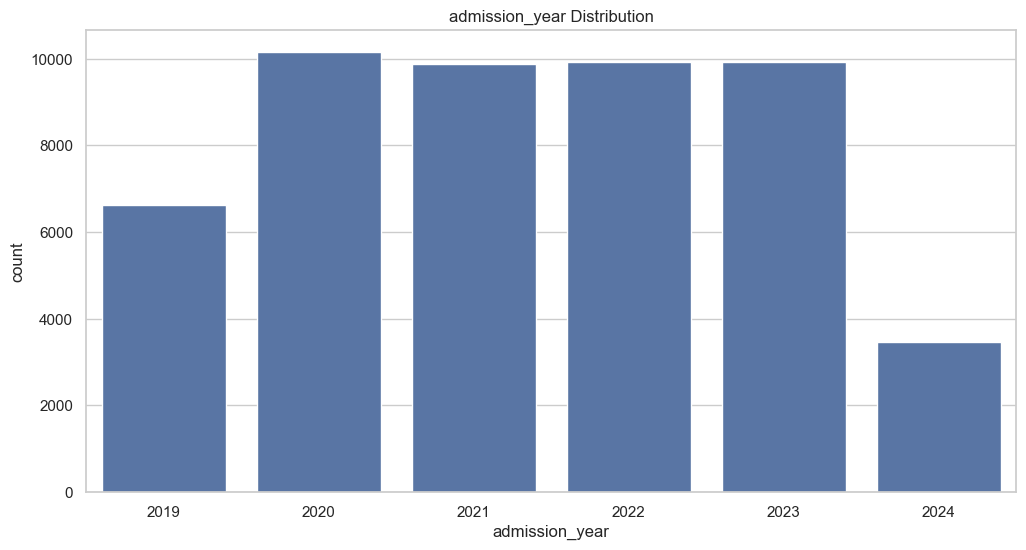

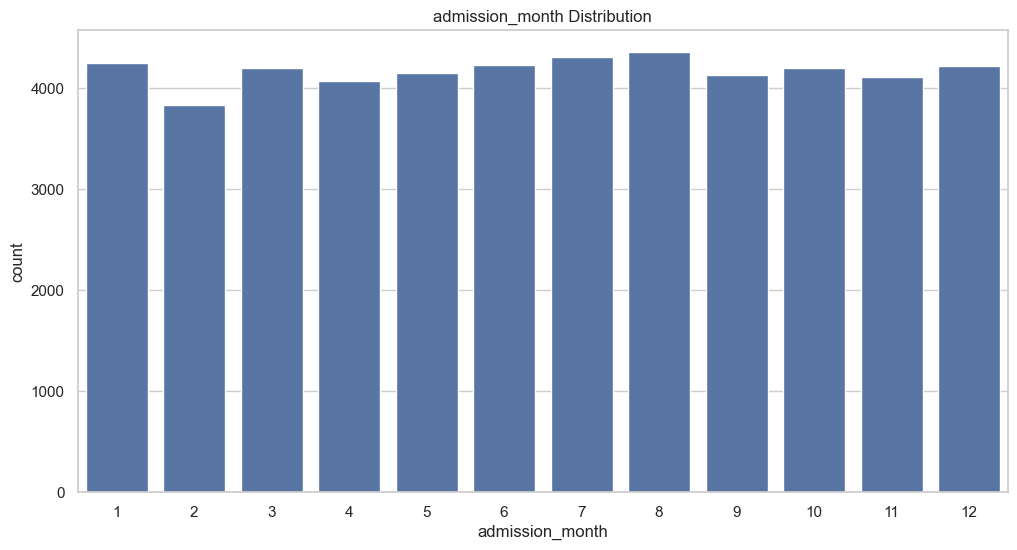

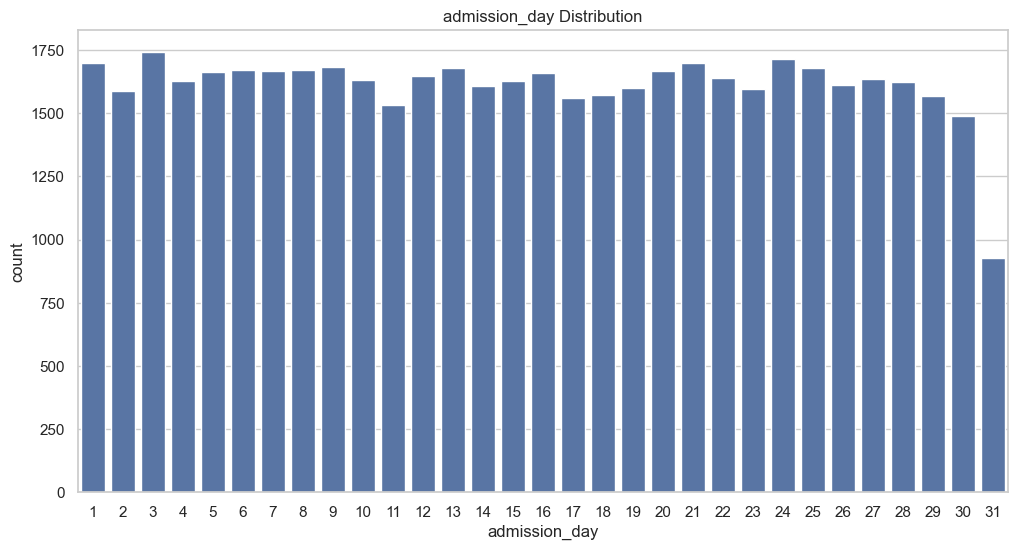

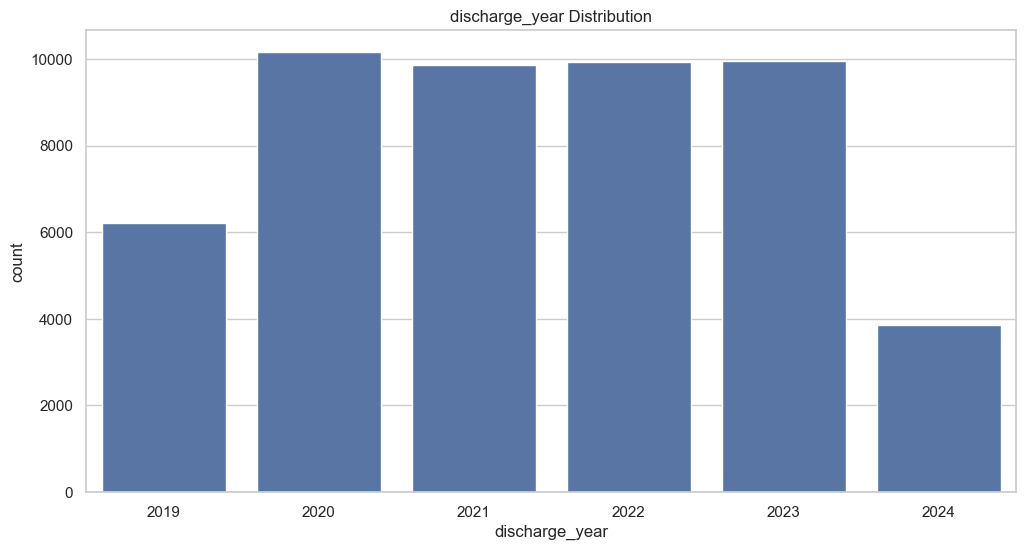

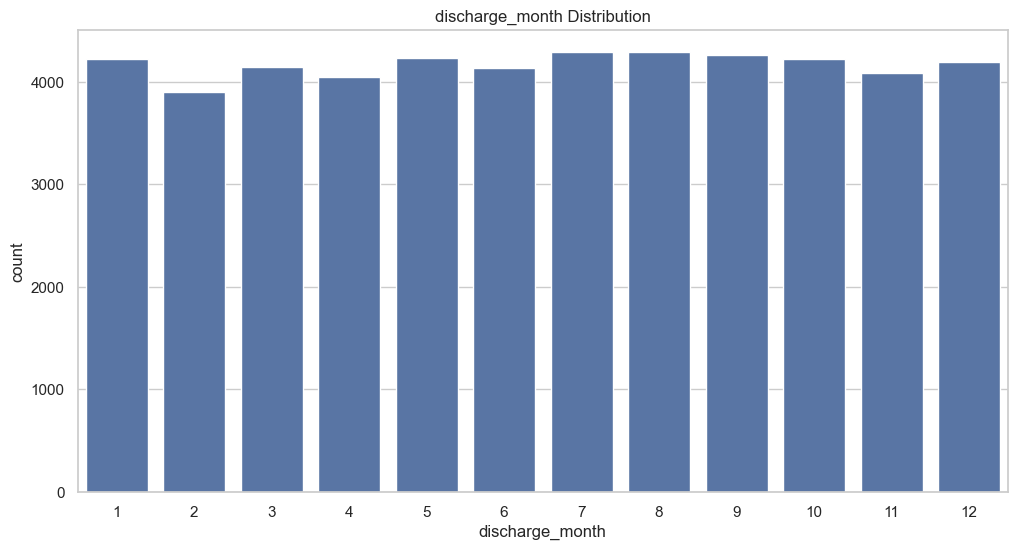

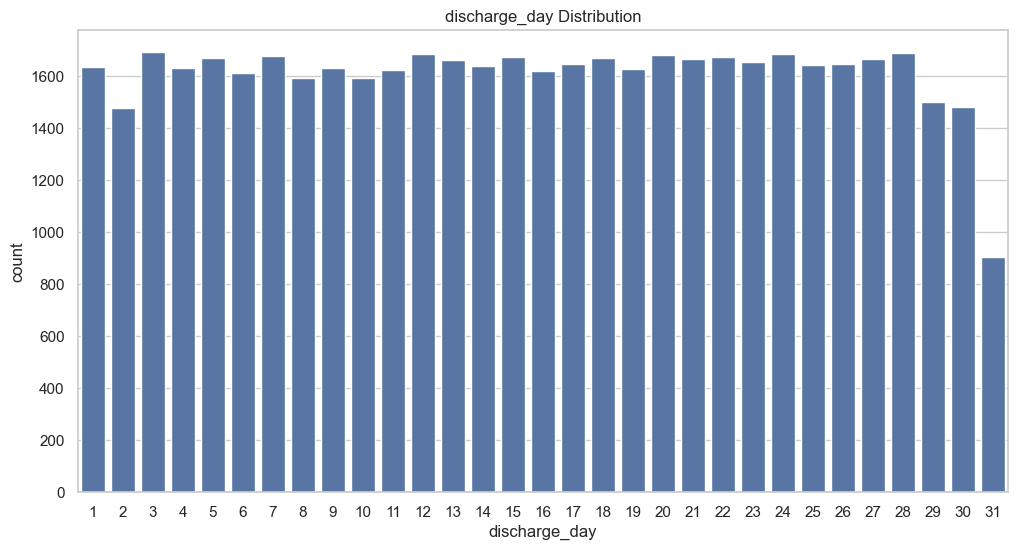

In [28]:
# Create Dataframe for checking date columns by year, month and day :
df_date = df_mongo[['date_of_admission', 'discharge_date']].copy()
df_date['admission_year'] = df_mongo['date_of_admission'].dt.year
df_date['admission_month'] = df_mongo['date_of_admission'].dt.month
df_date['admission_day'] = df_mongo['date_of_admission'].dt.day
df_date['discharge_year'] = df_mongo['discharge_date'].dt.year
df_date['discharge_month'] = df_mongo['discharge_date'].dt.month
df_date['discharge_day'] = df_mongo['discharge_date'].dt.day

# Loop for date columns and show distribution
for col in df_date.columns:
    if 'year' in col or 'month' in col or 'day' in col:
        sns.countplot(x=col, data=df_date)
        plt.title(f'{col} Distribution')
        plt.show()

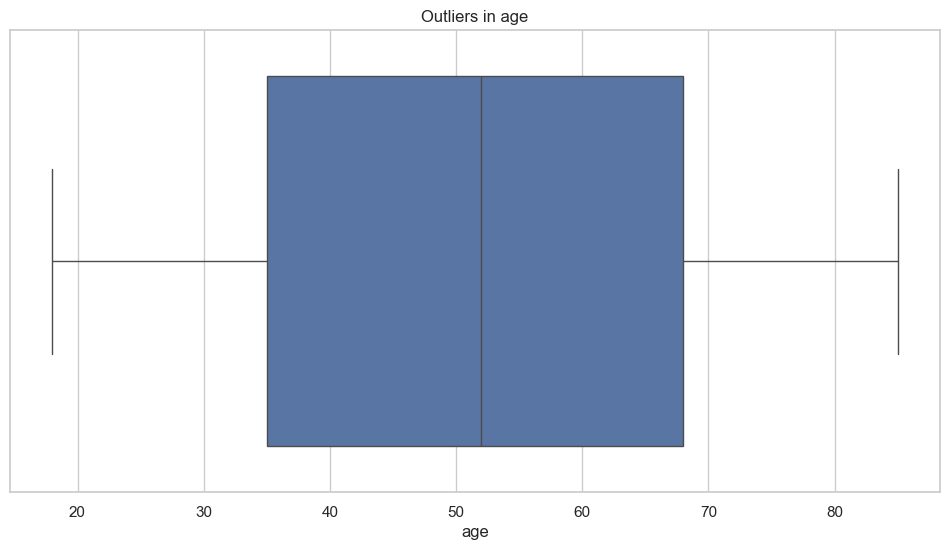

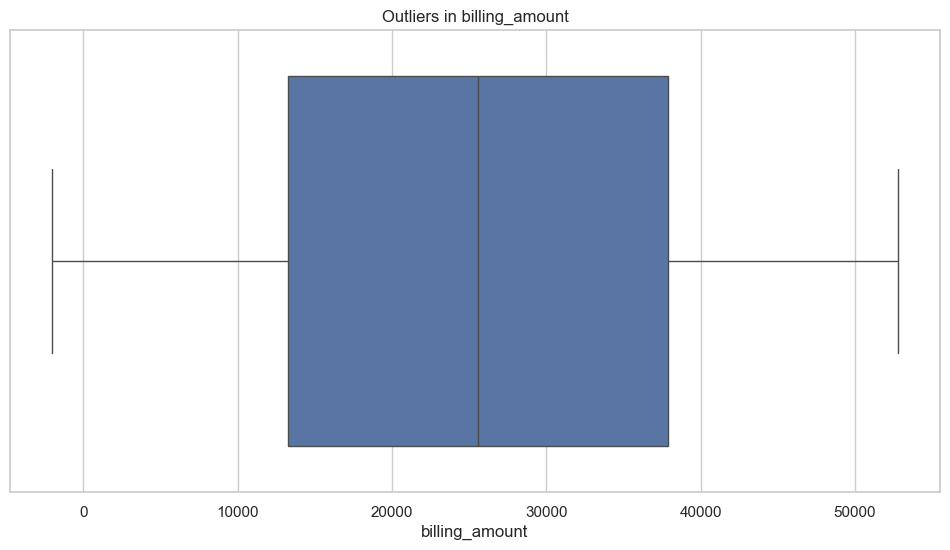

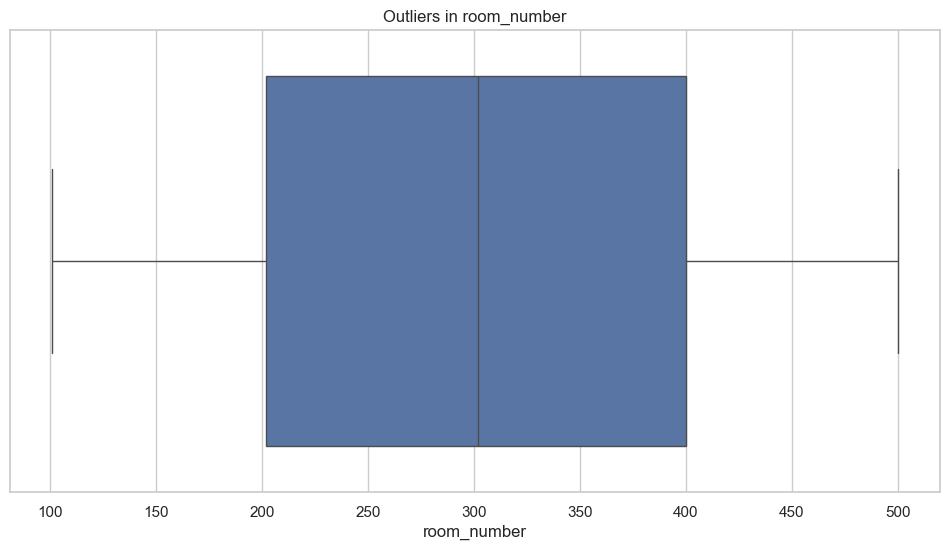

In [29]:
# Loop Boxplot for numerical column and show outliers
for col in df_mongo.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df_mongo[col])
    plt.title(f"Outliers in {col}")
    plt.show()


## Conclusion

This notebook allowed us to explore and validate the structure, quality, and statistical properties of the data at all stages.

- We gained insight into categorical and numerical columns.
- We duplicated values and anomalies.
- We confirmed that the migration preserved data structure and content.

This EDA serves as a foundation for future modeling, analysis, or dashboarding.
